# Perceptron

## Functions

### Plotting Functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

### Perceptron Step Logic

In [ ]:
def percep_step(input, th=0):
    return 1 if input > th else -1 if input < -th else 0

### Training

In [ ]:
def percep_fit(X, target, th=0, a=1, max_epoch=-1, verbose=False, draw=False):
    w = np.zeros(len(X[0]) + 1)
    bias = np.ones((len(X), 1))
    X = np.hstack((bias, X))
    stop = False
    epoch = 0

    while not stop and (max_epoch == -1 or epoch < max_epoch):
        stop = True
        epoch += 1

        if verbose:
            print('\nEpoch', epoch)

        for r, row in enumerate(X):
            y_in = np.dot(row, w)
            y = percep_step(y_in, th)

            if y != target[r]:
                stop = False
                w = [w[i] + a * target[r] * row[i] for i in range(len(row))]

            if verbose:
                print('Bobot:', w)
            if draw:
                plot(line(w, th), line(w, -th), X, target)

    return w, epoch

### Testing

In [ ]:
def percep_predict(X, w, th=0):
    Y = []

    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)

        Y.append(y)
    return Y

### Calculate Accuracy


In [ ]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)

### AND Logic


Epoch 1
Bobot: [1.0, 1.0, 1.0]


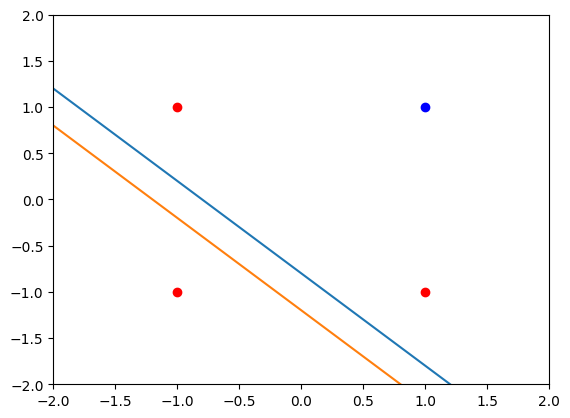

Bobot: [0.0, 0.0, 2.0]


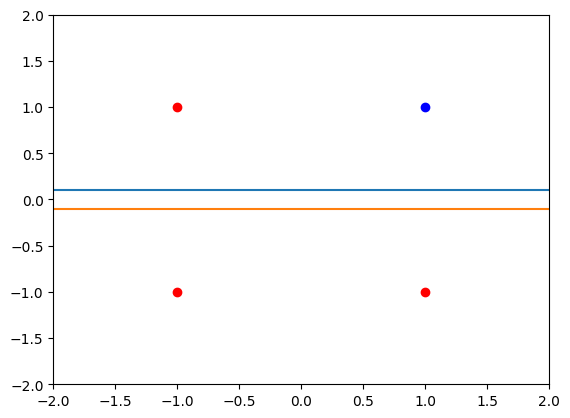

Bobot: [-1.0, 1.0, 1.0]


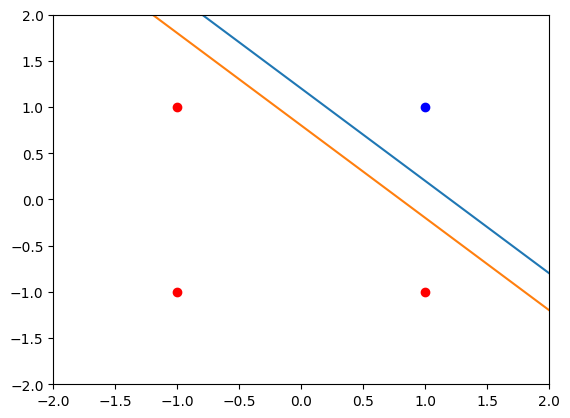

Bobot: [-1.0, 1.0, 1.0]


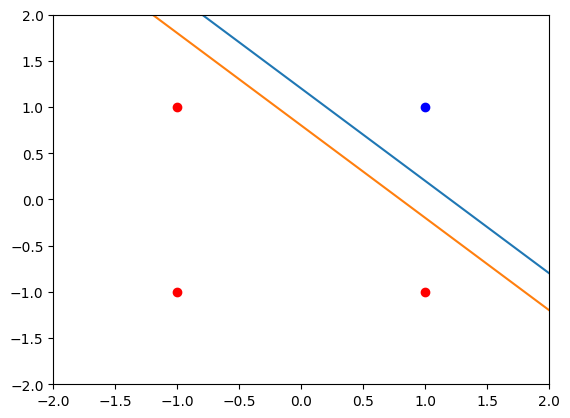


Epoch 2
Bobot: [-1.0, 1.0, 1.0]


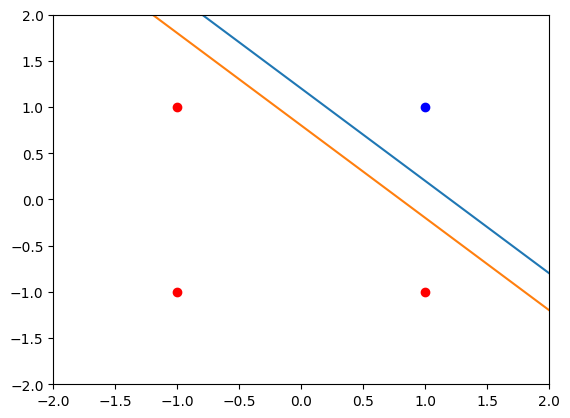

Bobot: [-1.0, 1.0, 1.0]


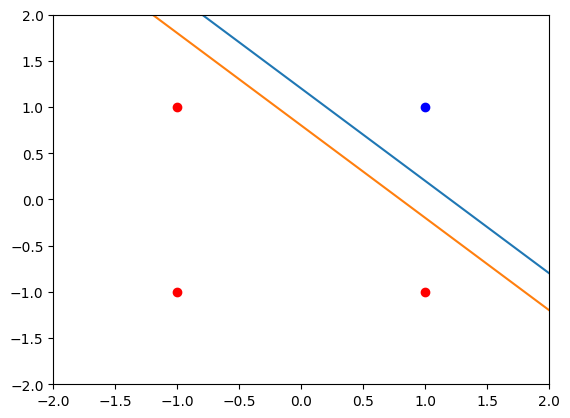

Bobot: [-1.0, 1.0, 1.0]


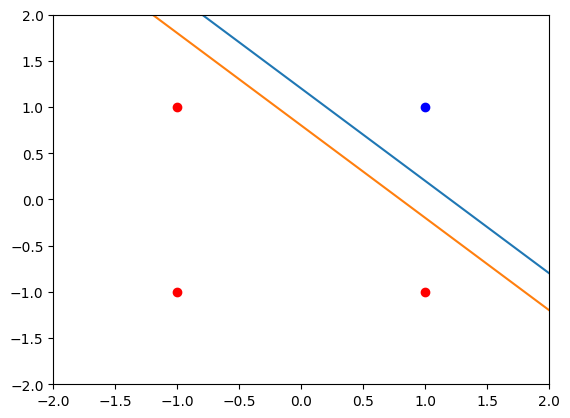

Bobot: [-1.0, 1.0, 1.0]


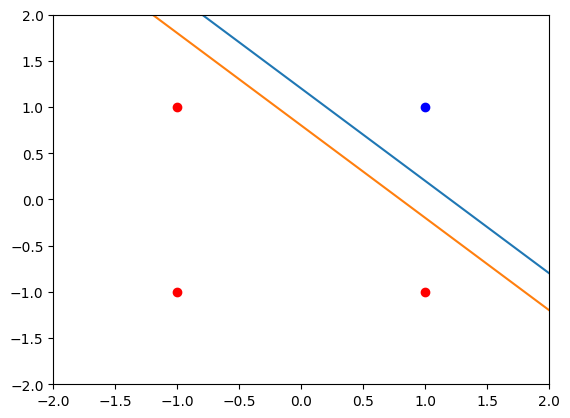

Epochs: 2
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True,
draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### OR Logic


Epoch 1
Bobot: [1.0, 1.0, 1.0]


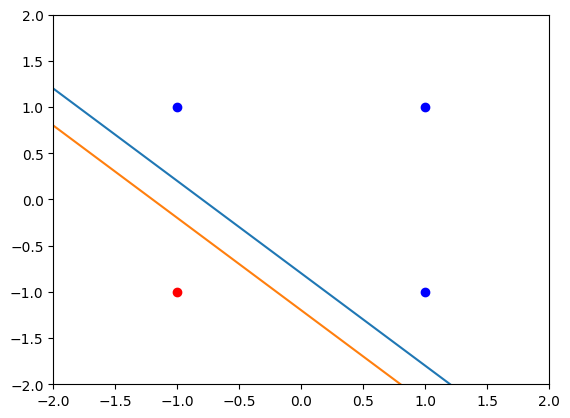

Bobot: [1.0, 1.0, 1.0]


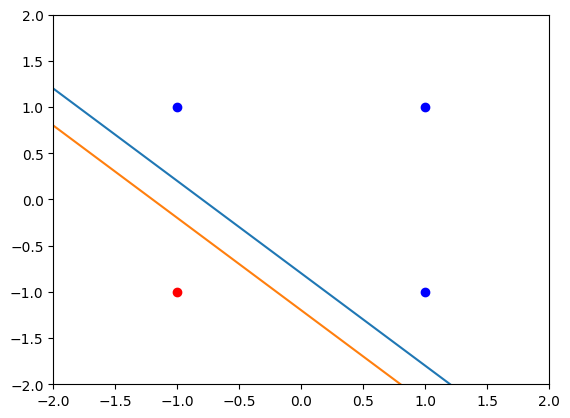

Bobot: [1.0, 1.0, 1.0]


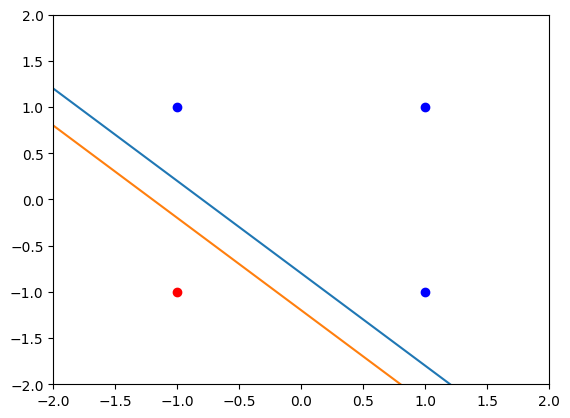

Bobot: [1.0, 1.0, 1.0]


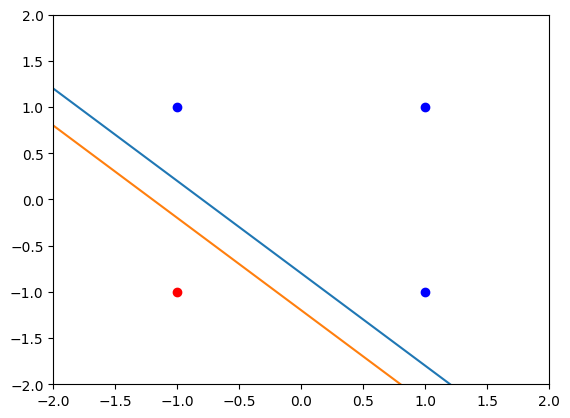


Epoch 2
Bobot: [1.0, 1.0, 1.0]


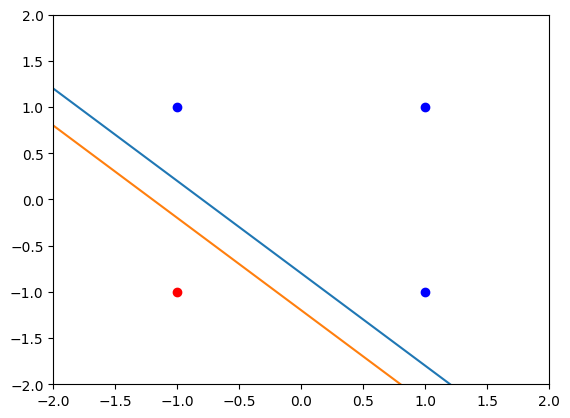

Bobot: [1.0, 1.0, 1.0]


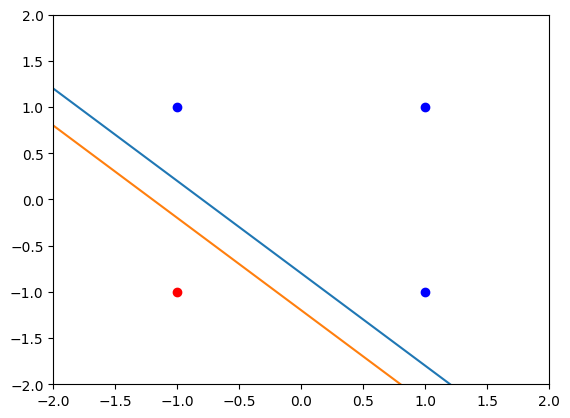

Bobot: [1.0, 1.0, 1.0]


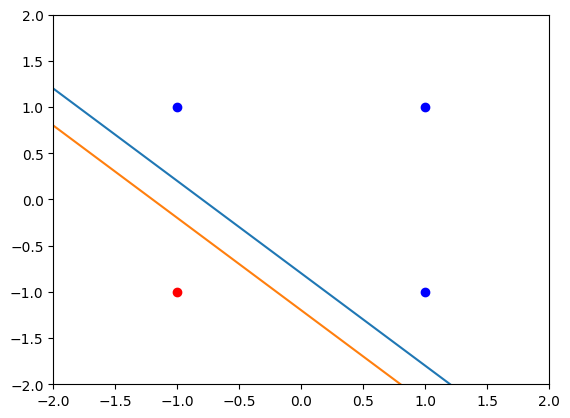

Bobot: [1.0, 1.0, 1.0]


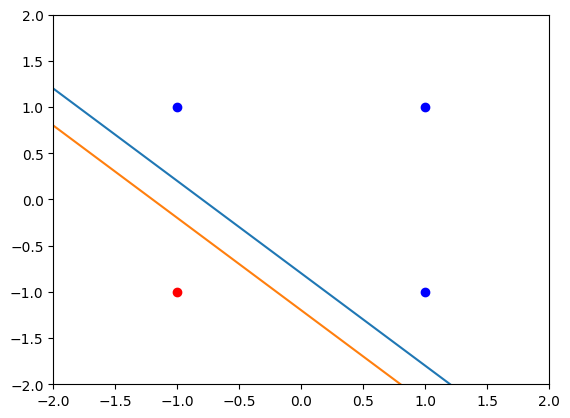

Epochs: 2
Output: [1, 1, 1, -1]
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### ANDNOT Logic


Epoch 1
Bobot: [-1.0, -1.0, -1.0]


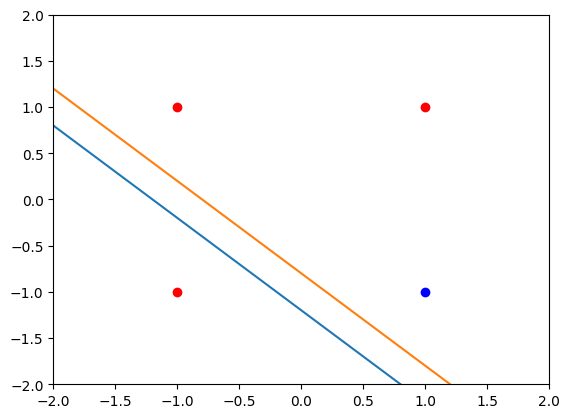

Bobot: [0.0, 0.0, -2.0]


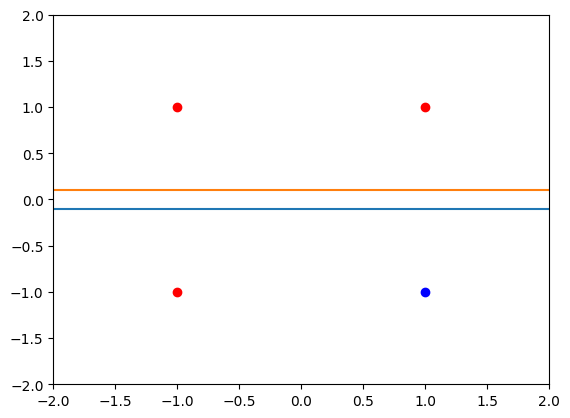

Bobot: [0.0, 0.0, -2.0]


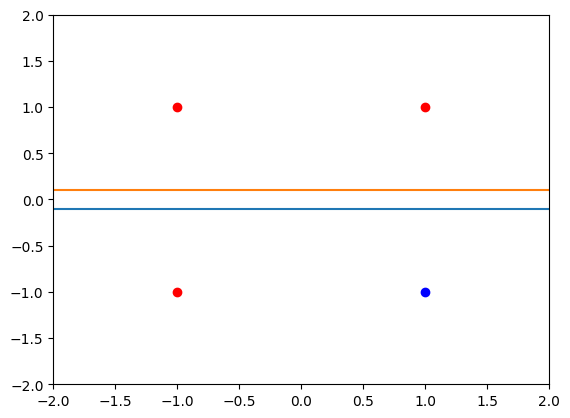

Bobot: [-1.0, 1.0, -1.0]


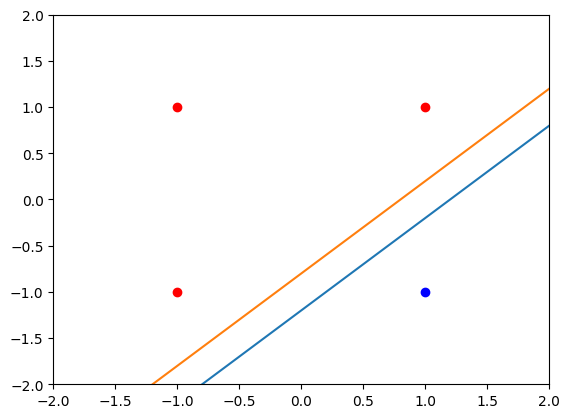


Epoch 2
Bobot: [-1.0, 1.0, -1.0]


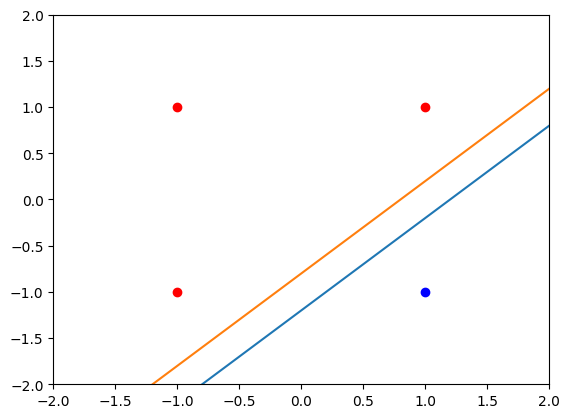

Bobot: [-1.0, 1.0, -1.0]


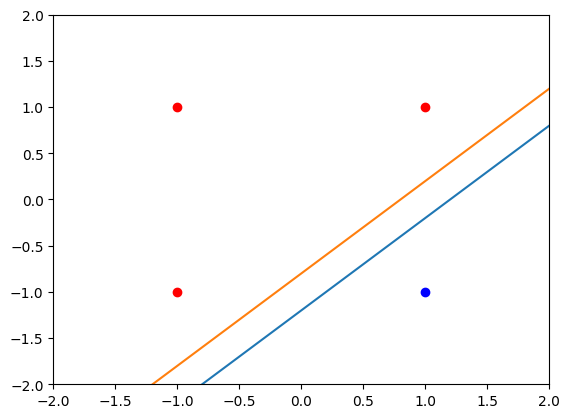

Bobot: [-1.0, 1.0, -1.0]


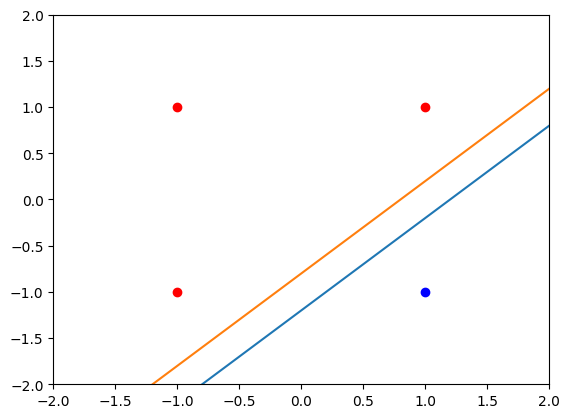

Bobot: [-1.0, 1.0, -1.0]


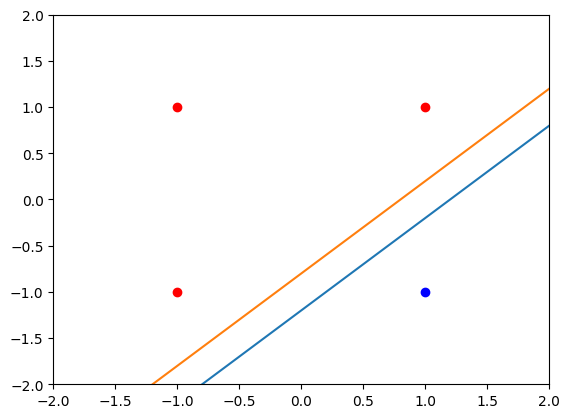

Epochs: 2
Output: [-1, 1, -1, -1]
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

### XOR Logic

In [ ]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
th = .2
model, epoch = percep_fit(train, target, th, max_epoch=50, verbose=True, draw=False)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 2
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 3
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 4
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 5
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 6
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 7
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 8
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 9
Bobot: [-1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, -2.0]
Bobot: [1.0, -1.0, -1.0]
Bobot: [0.0, 0.0, 0.0]

Epoch 10
Bobot: [-1.0, -1.0, -1.0]
B

### AND Logic Testing


Epoch 1
Bobot: [0.3, 0.3, 0.3]


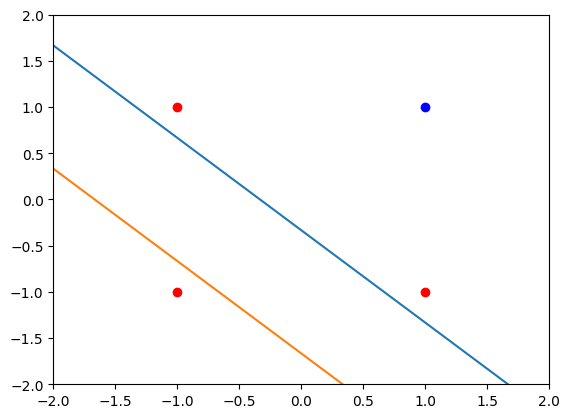

Bobot: [0.0, 0.0, 0.6]


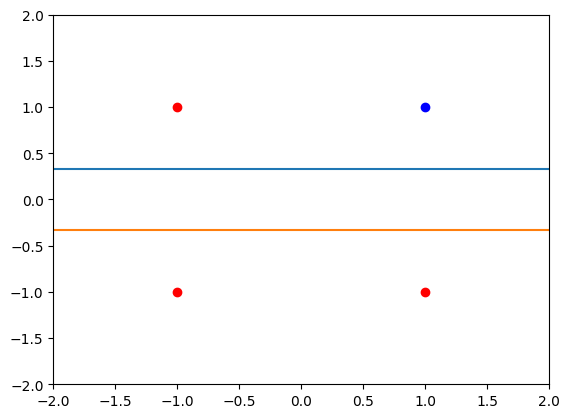

Bobot: [-0.3, 0.3, 0.3]


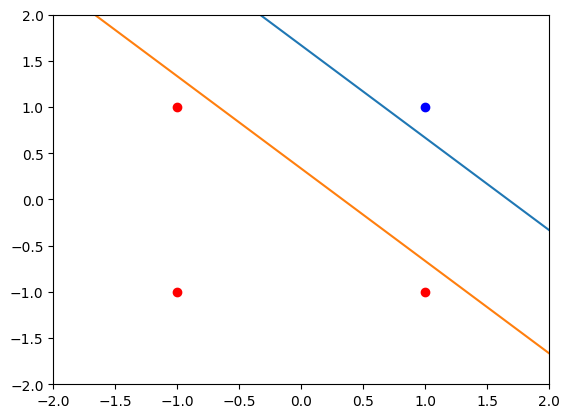

Bobot: [-0.3, 0.3, 0.3]


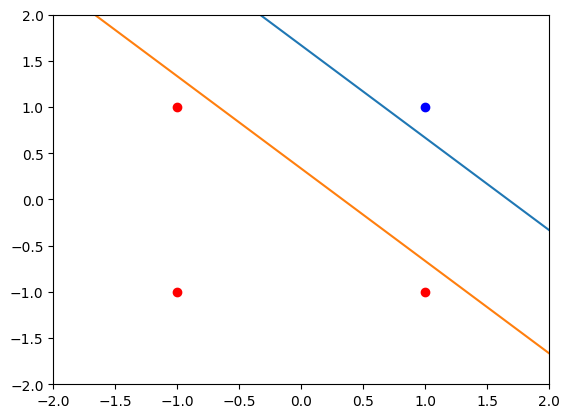


Epoch 2
Bobot: [-0.3, 0.3, 0.3]


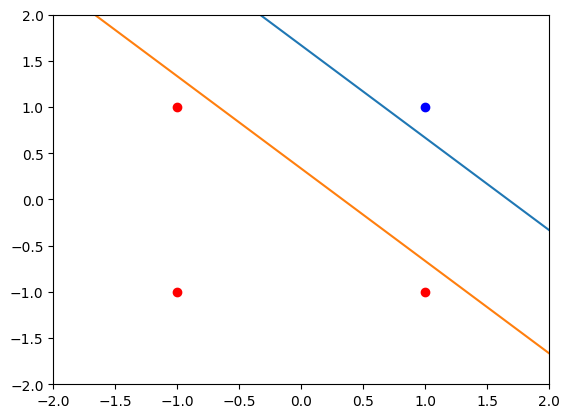

Bobot: [-0.3, 0.3, 0.3]


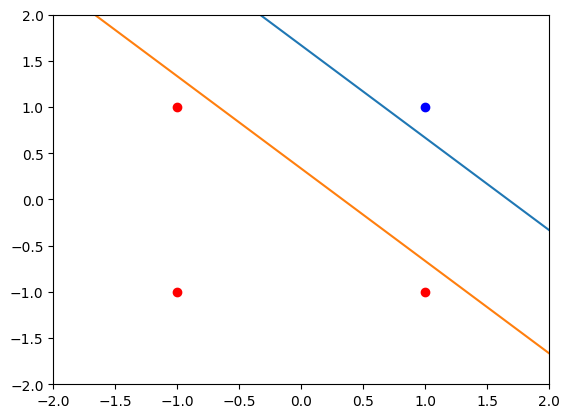

Bobot: [-0.3, 0.3, 0.3]


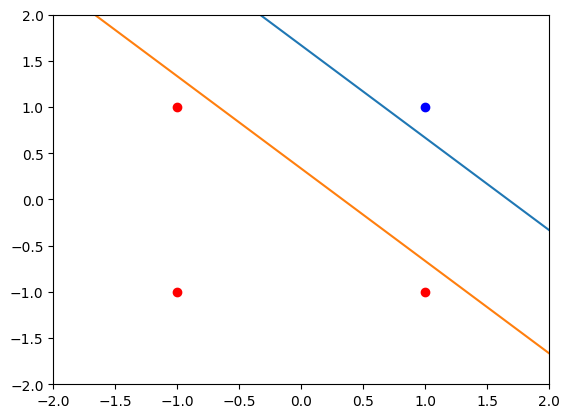

Bobot: [-0.3, 0.3, 0.3]


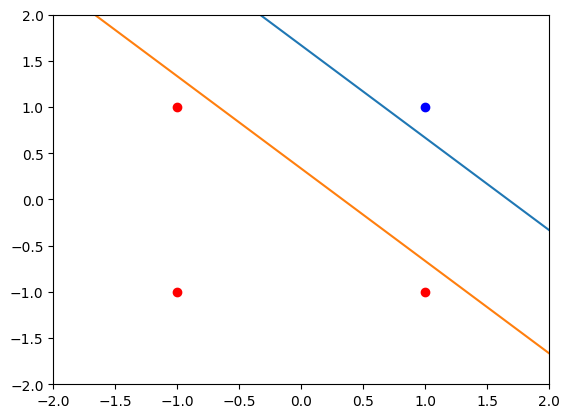

Learning Rate: 0.3
Epochs: 2
Output: [1, -1, -1, -1]
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [ ]:
# Testing Logika AND

train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
th = .2
a = 0.3
model, epoch = percep_fit(train, target, th, a, -1, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Learning Rate:', a)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

## Iris Dataset Classification using Perceptron

https://www.spataru.at/images/blog/iris-dataset-svm/iris_types.jpg

### Load Data

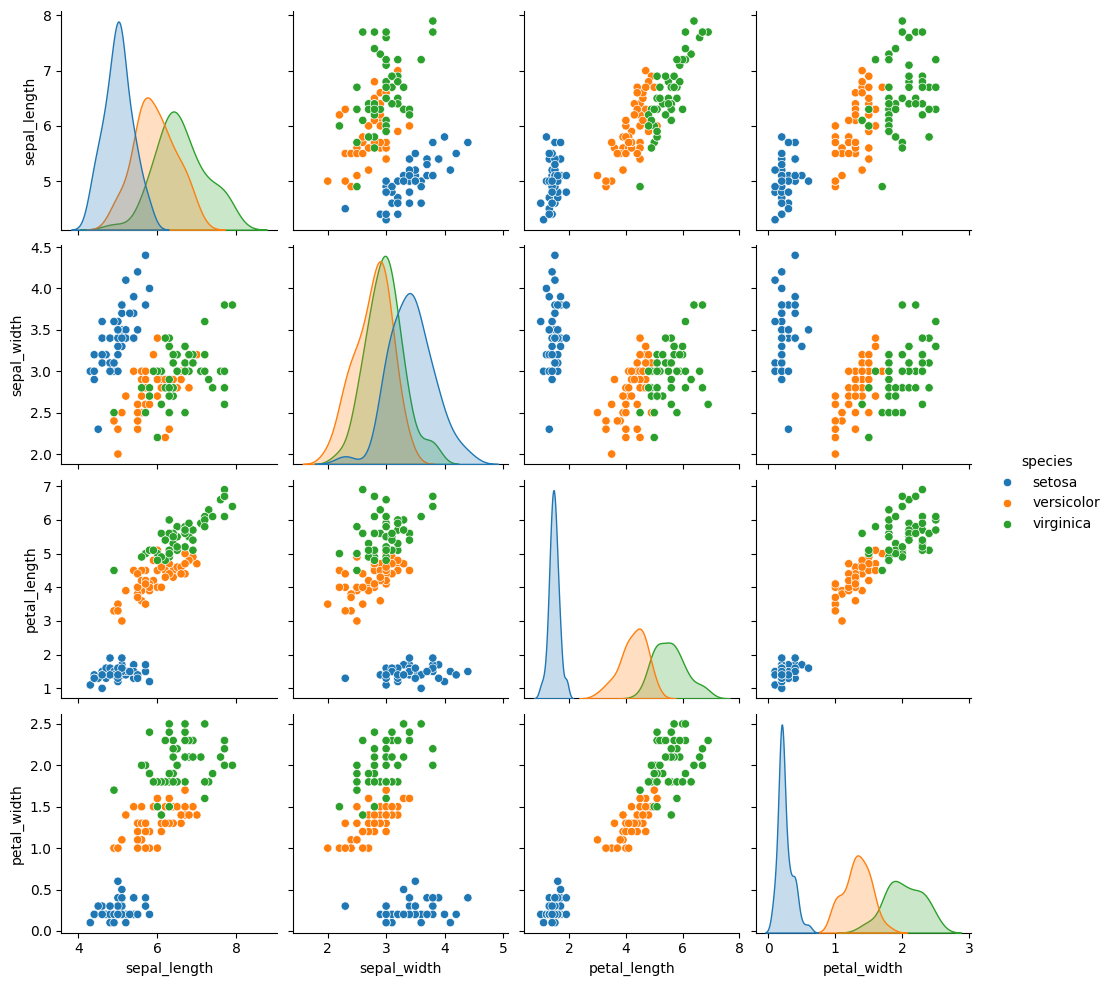

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species')
plt.show()

### Deleting Class Virginica

Because Perceptron can only perceive binary classifications

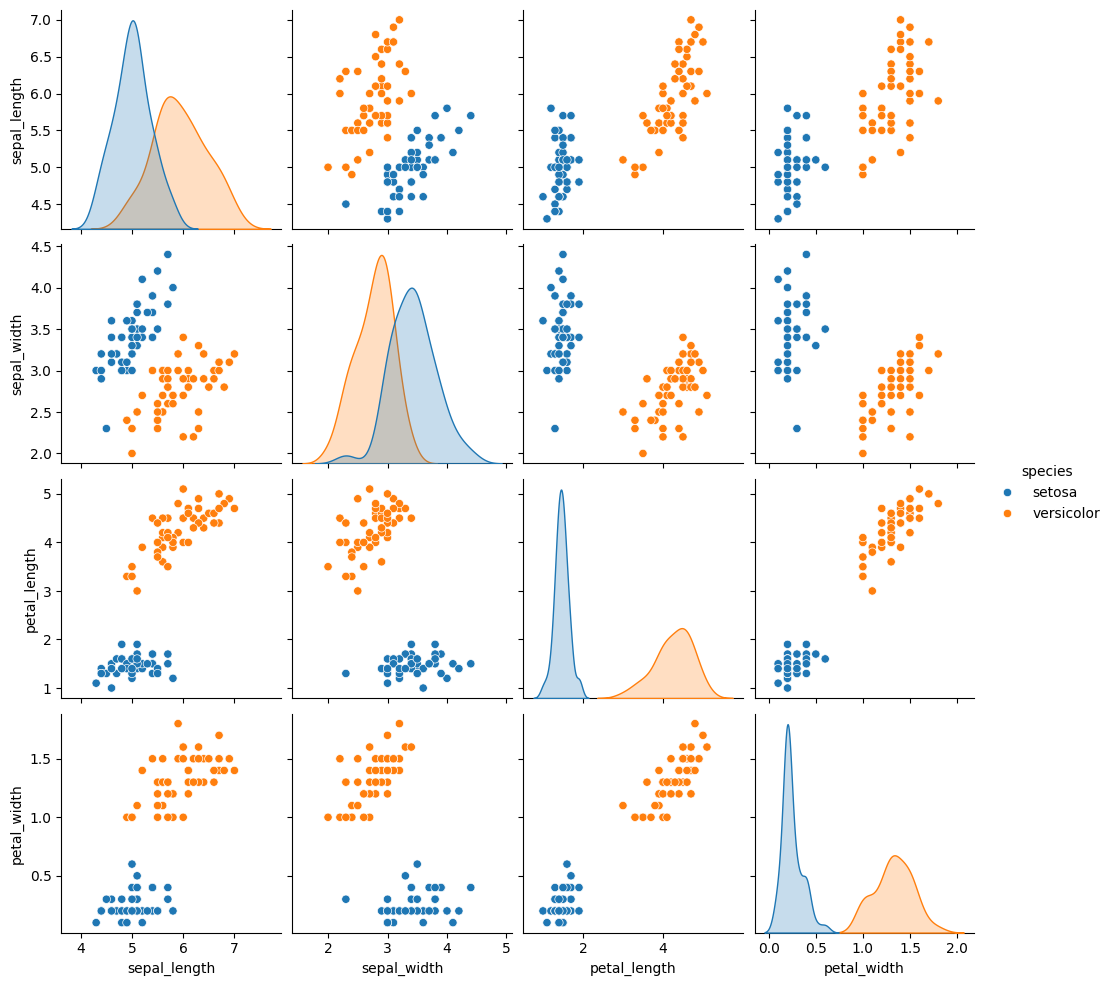

In [ ]:
iris = iris.loc[iris['species'] != 'virginica']

sns.pairplot(iris, hue='species')
plt.show()

### Deleting 'sepal_width' and 'petal_width' feature

For testing purposes

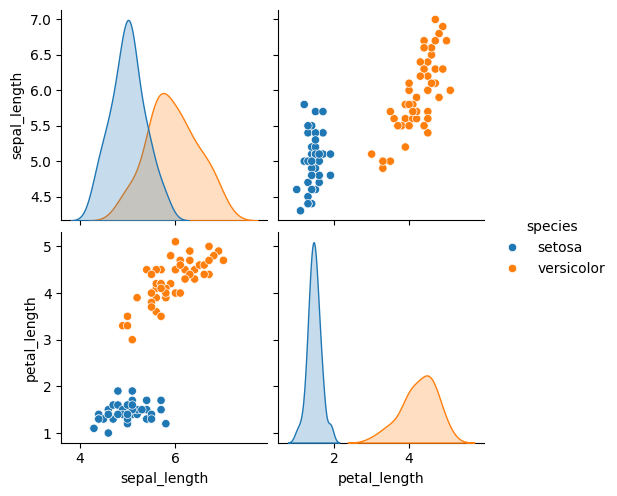

In [ ]:
iris = iris.drop(['sepal_width', 'petal_width'], axis=1)

sns.pairplot(iris, hue='species')
plt.show()

### Training and Testing


Epoch 1
Bobot: [1.0, 0.5925925925925928, 0.9268292682926831]


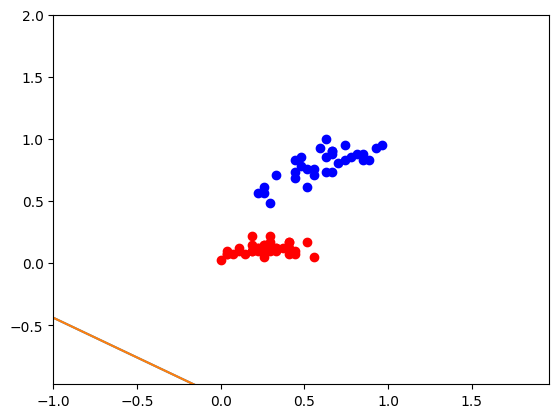

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


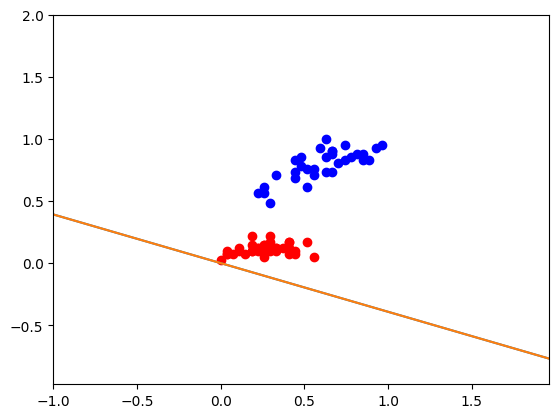

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


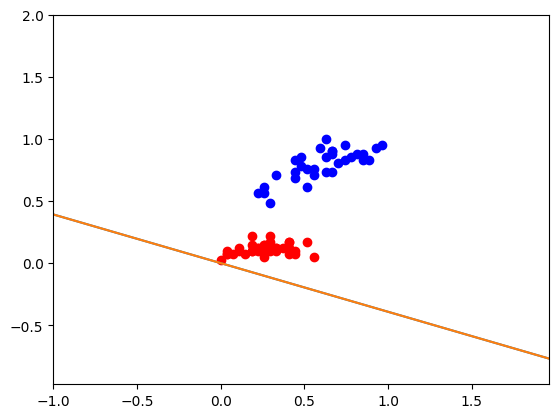

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


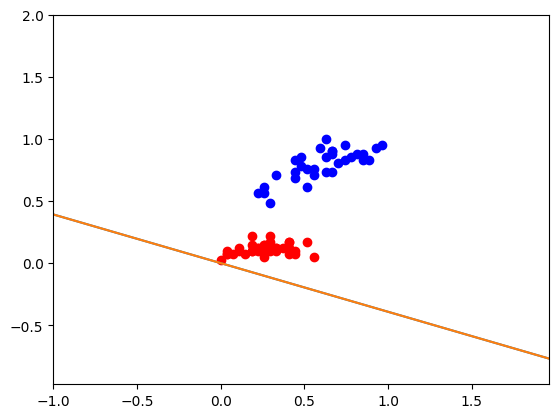

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


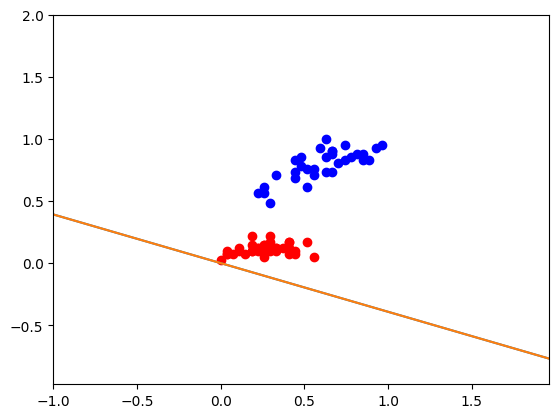

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


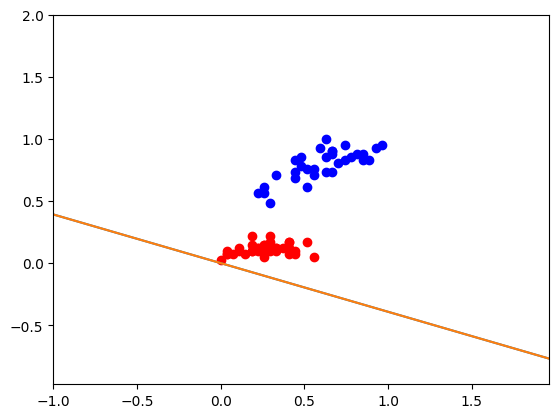

Bobot: [0.0, 0.2962962962962965, 0.7560975609756099]


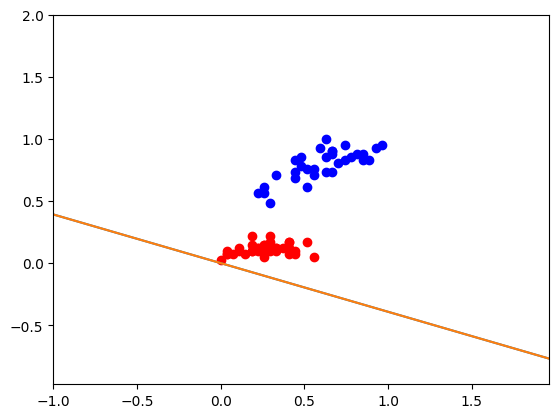

Bobot: [-1.0, -0.07407407407407396, 0.6341463414634148]


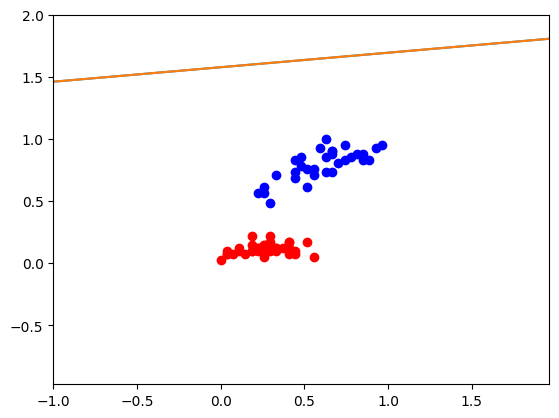

Bobot: [0.0, 0.37037037037037046, 1.3170731707317076]


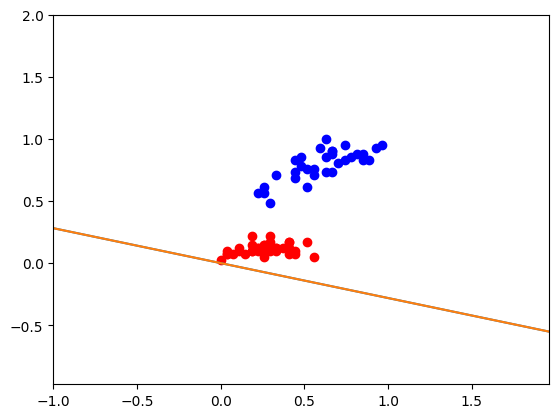

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


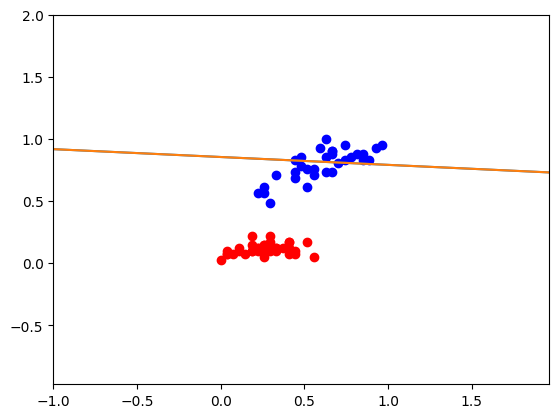

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


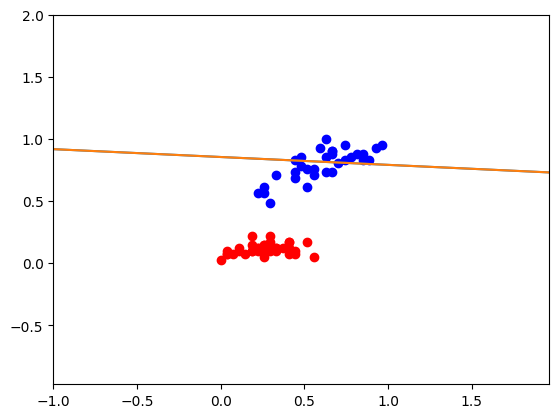

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


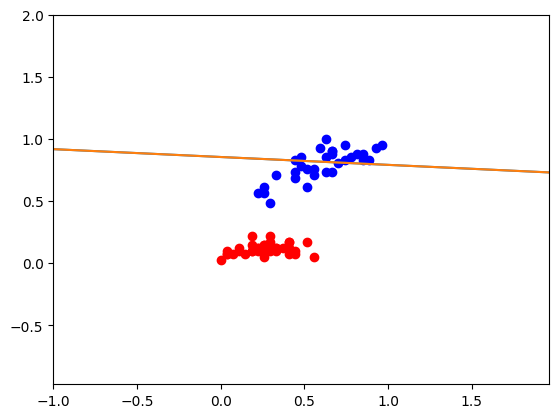

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


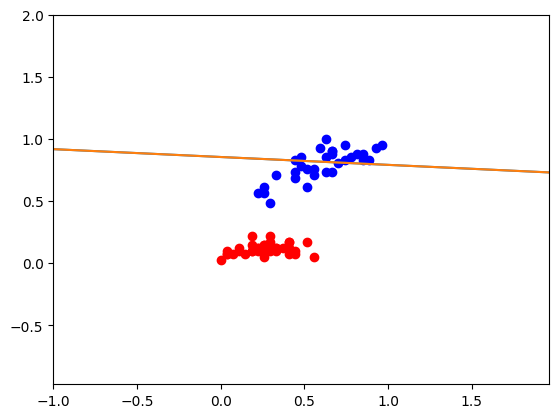

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


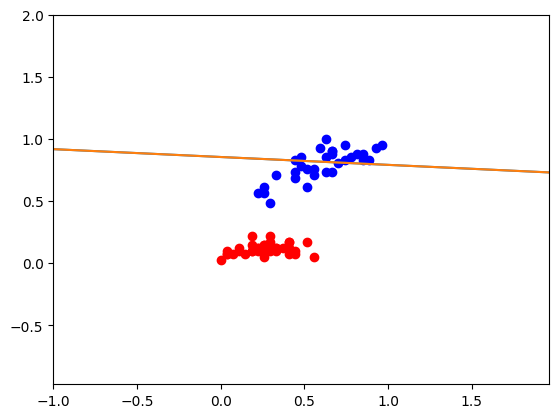

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


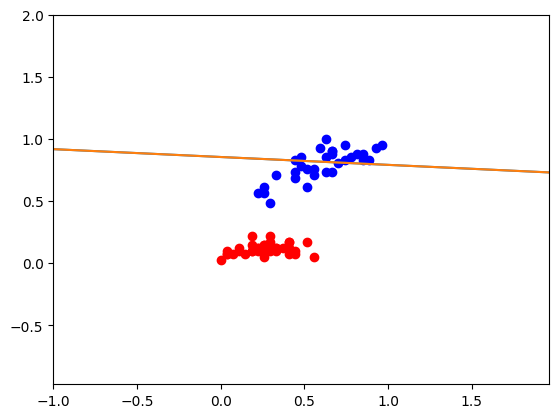

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


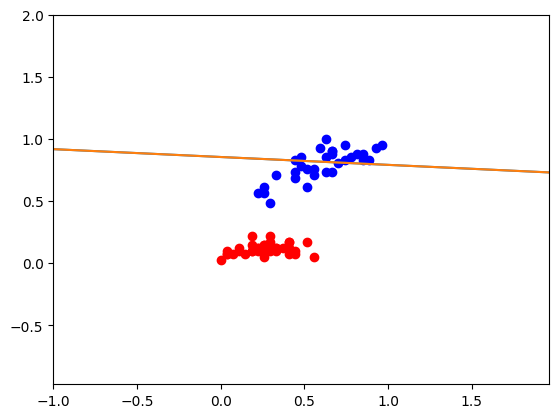

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


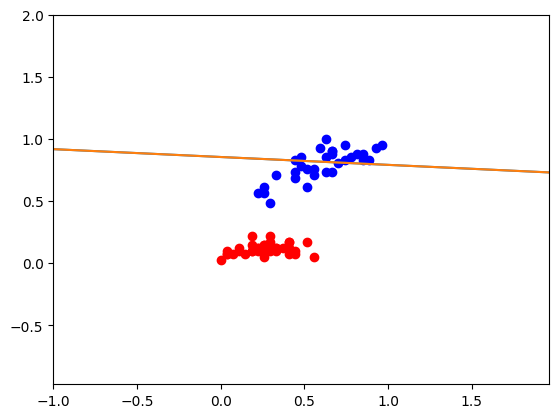

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


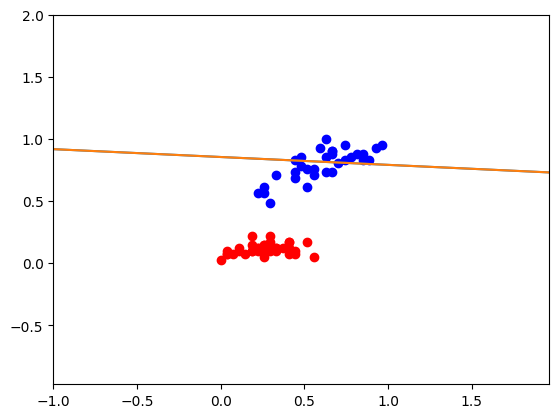

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


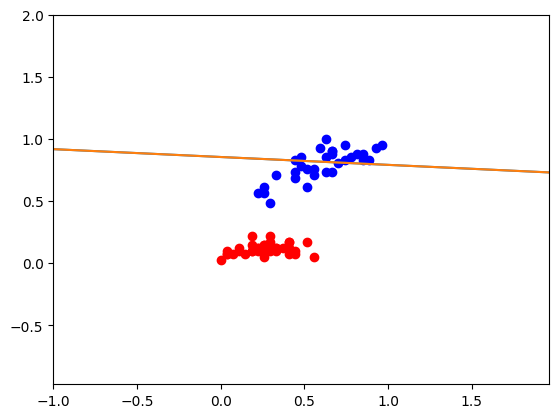

Bobot: [-1.0, 0.07407407407407418, 1.1707317073170733]


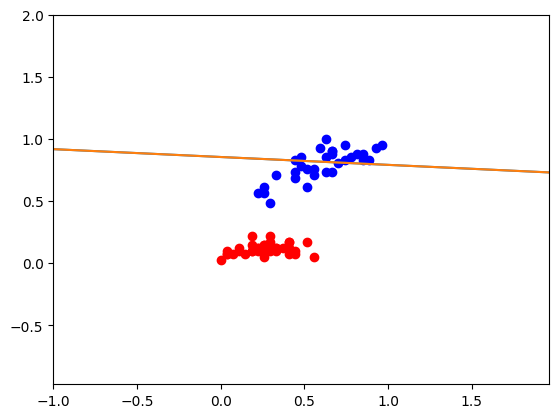

Bobot: [0.0, 0.592592592592593, 1.780487804878049]


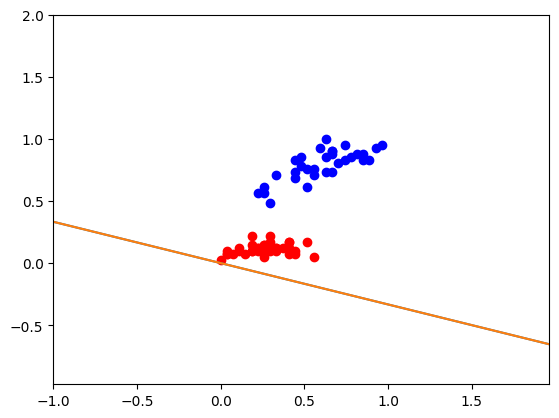

Bobot: [0.0, 0.592592592592593, 1.780487804878049]


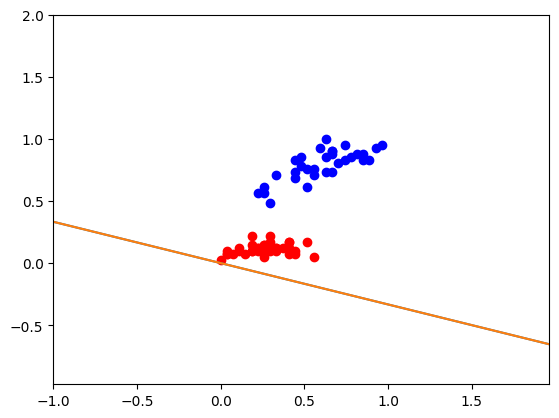

Bobot: [0.0, 0.592592592592593, 1.780487804878049]


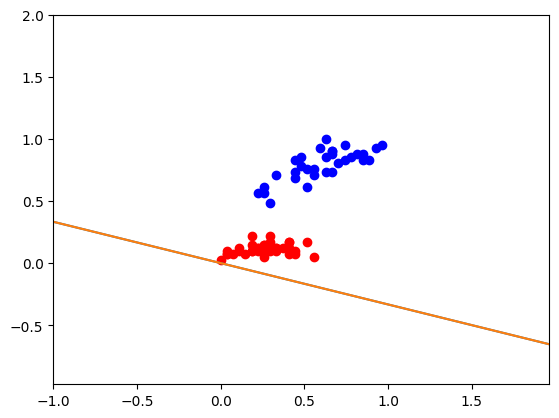

Bobot: [0.0, 0.592592592592593, 1.780487804878049]


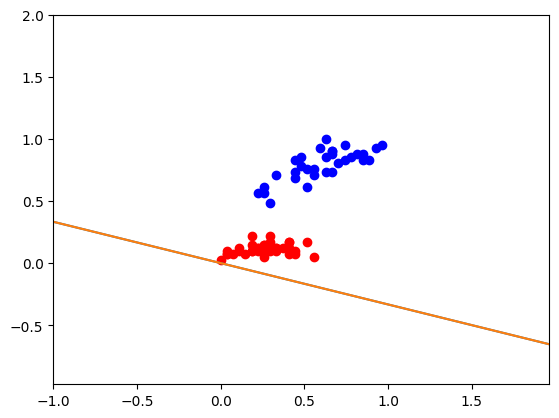

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


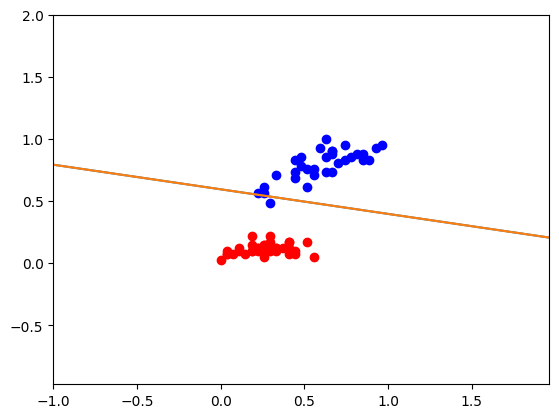

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


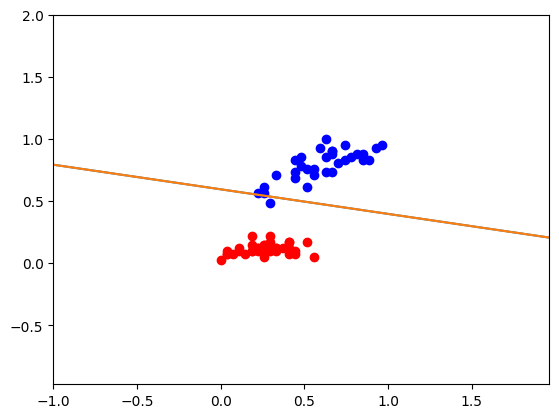

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


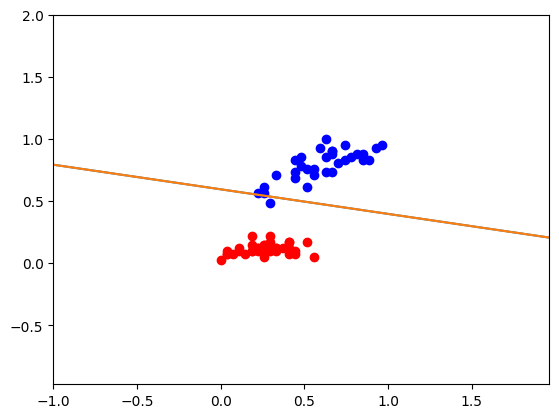

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


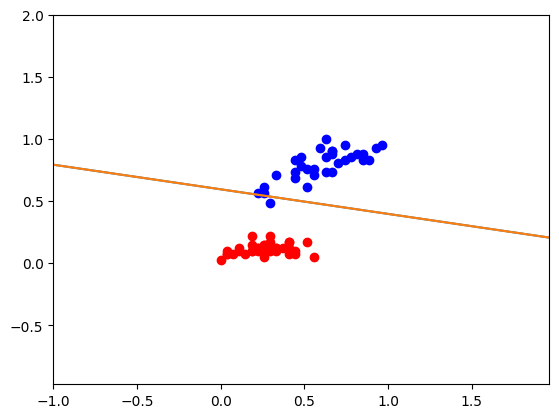

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


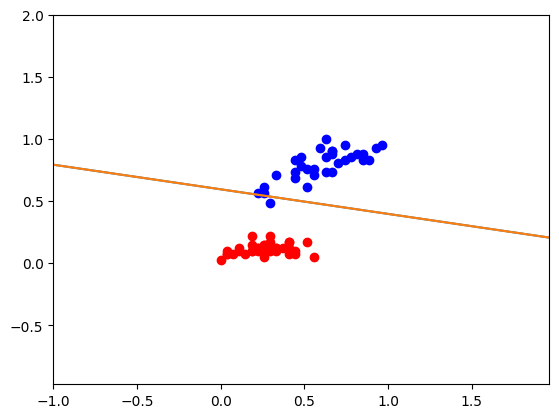

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


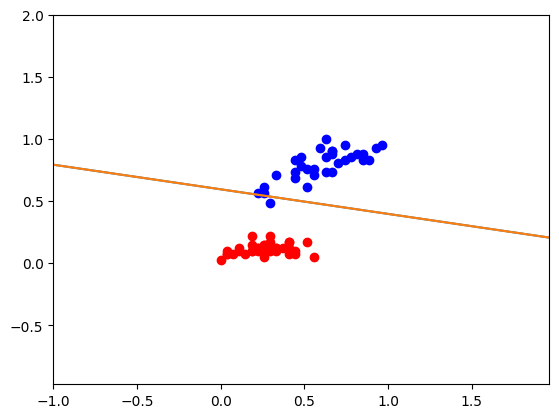

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


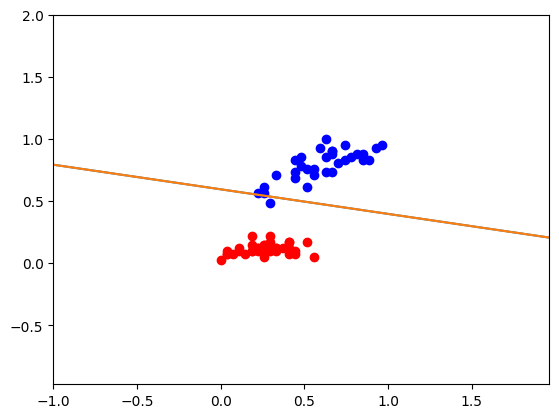

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


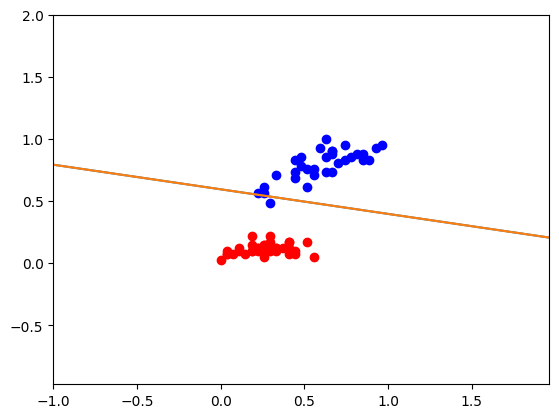

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


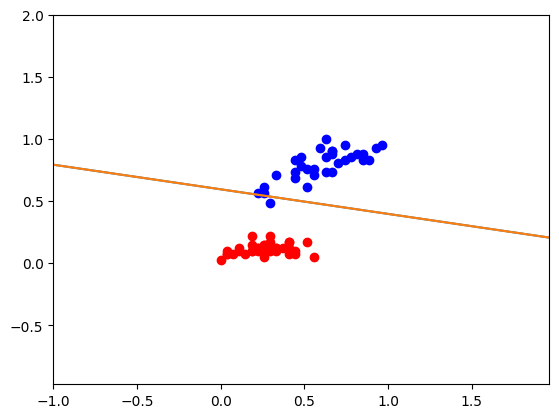

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


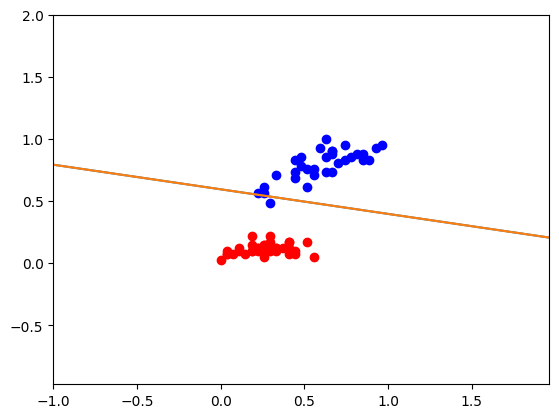

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


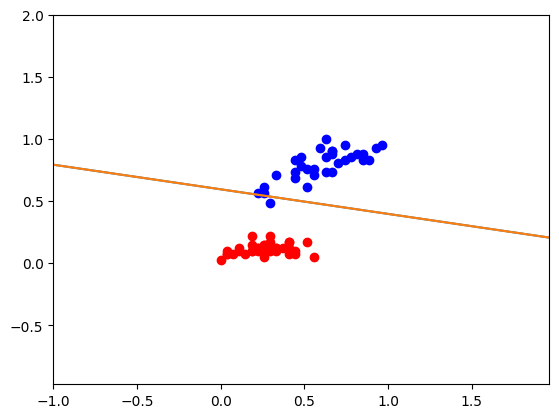

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


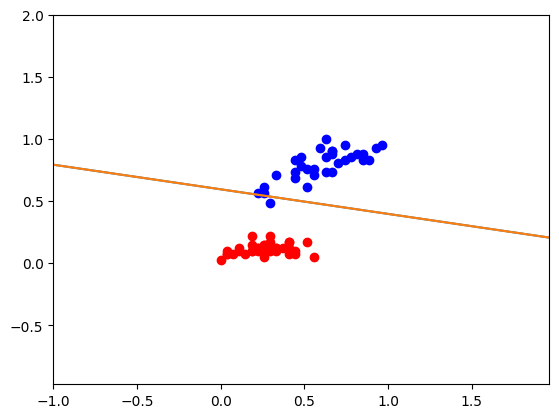

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


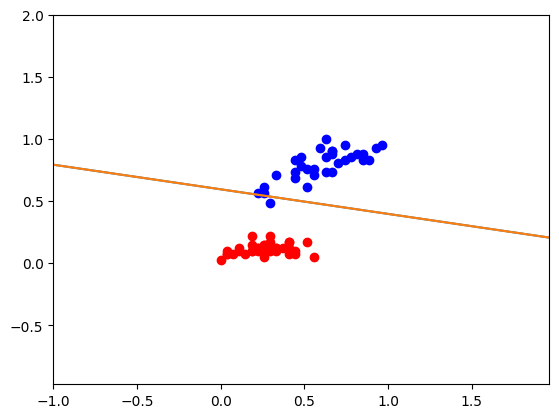

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


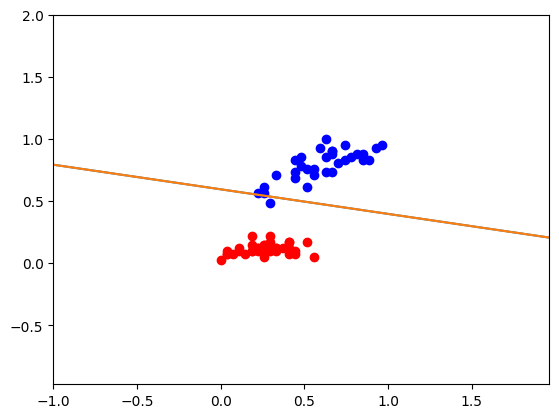

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


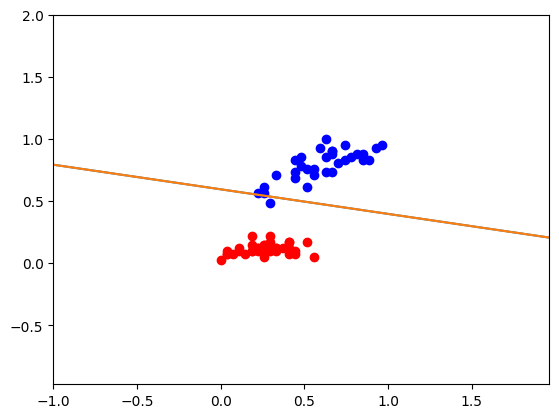

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


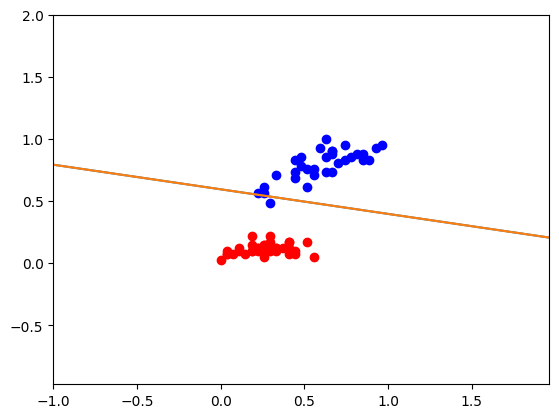

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


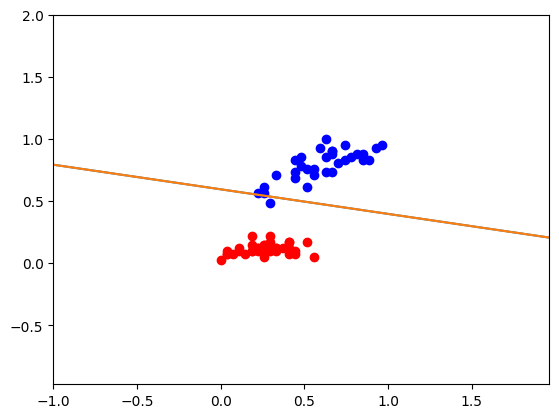

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


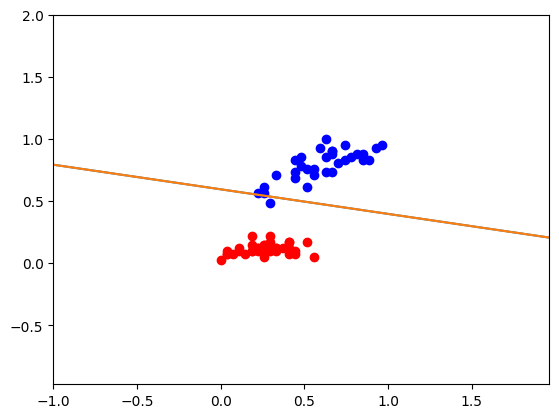

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


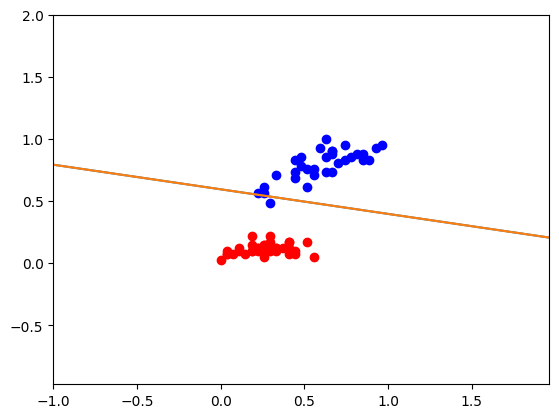

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


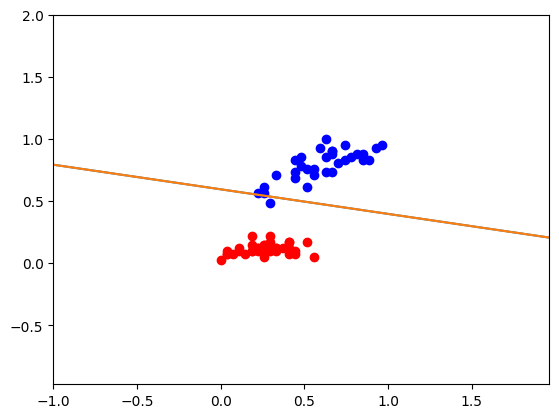

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


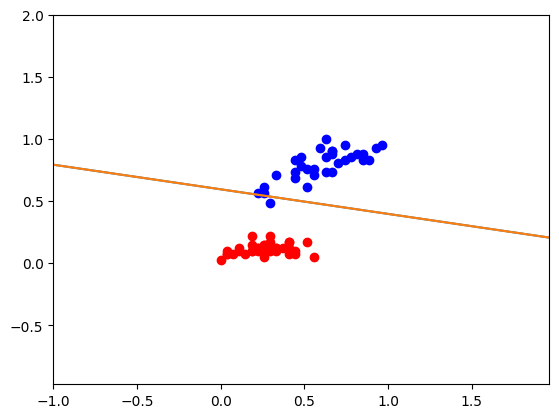

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


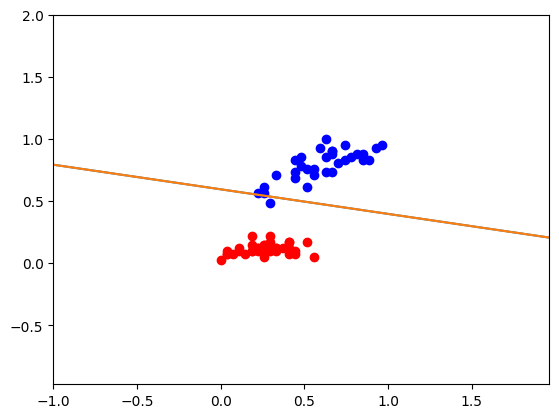

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


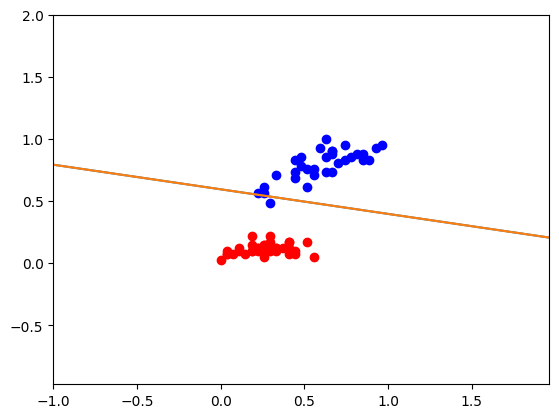

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


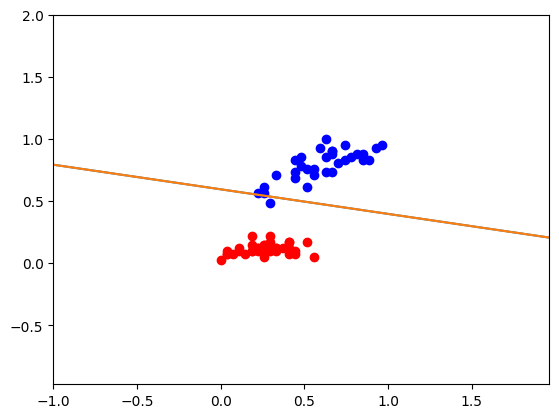

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


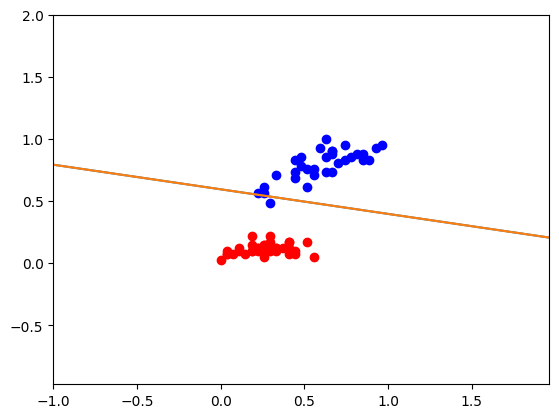

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


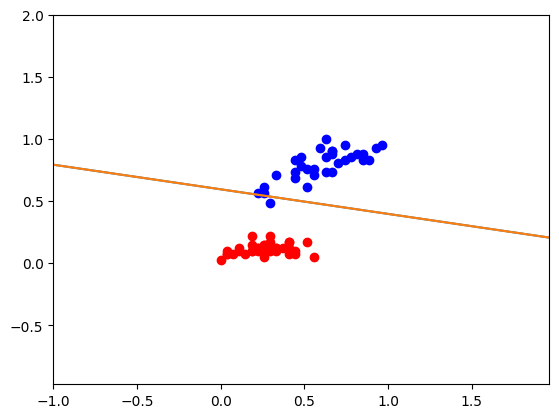

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


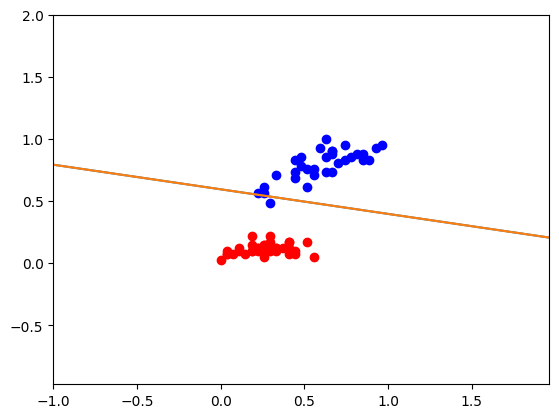

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


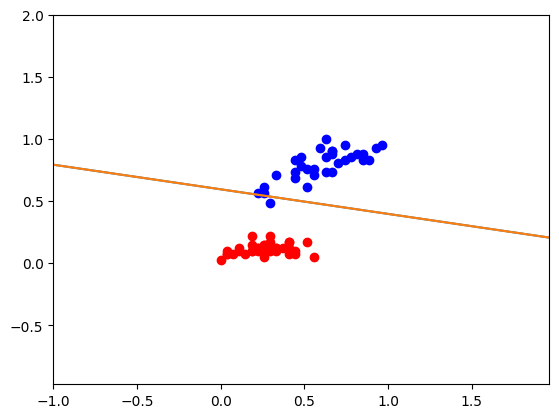

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


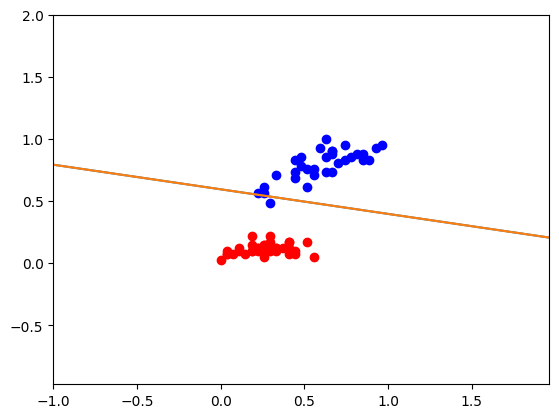

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


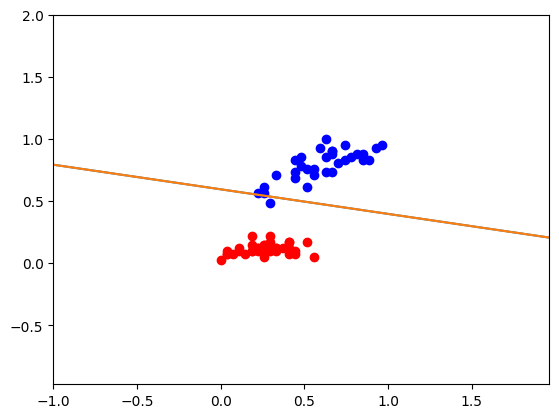

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


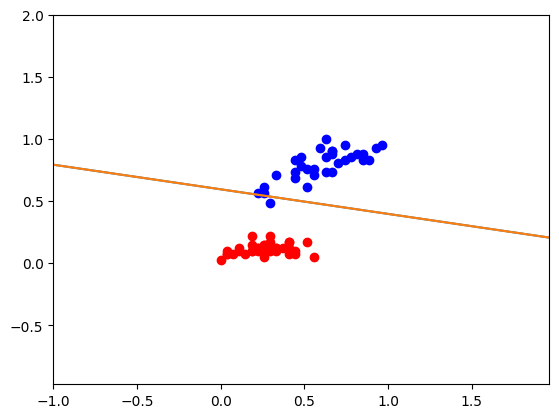

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


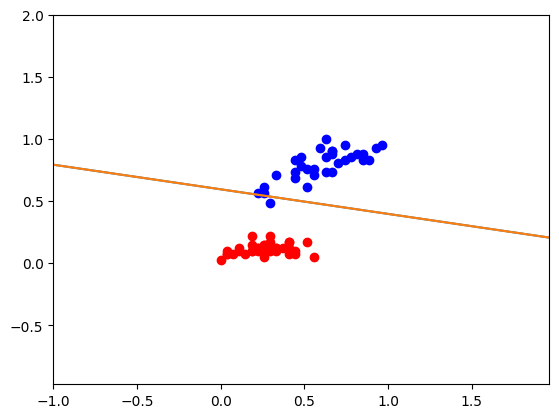

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


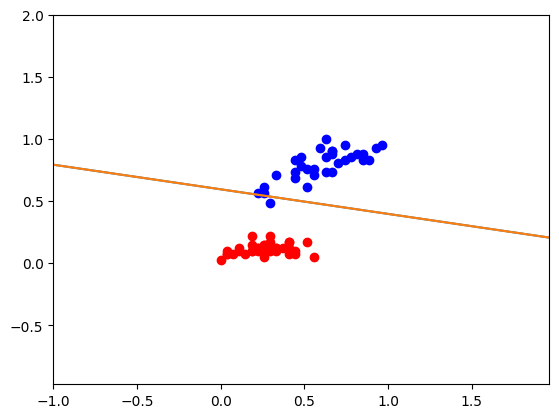

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


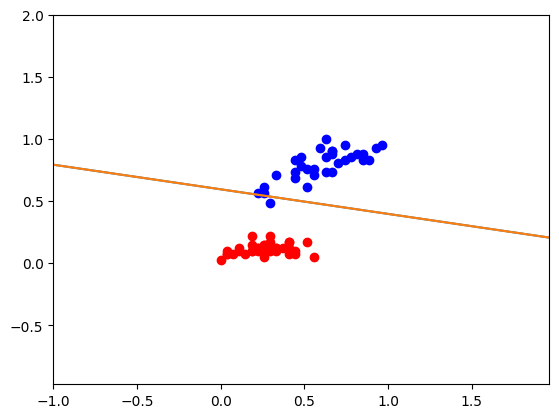

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


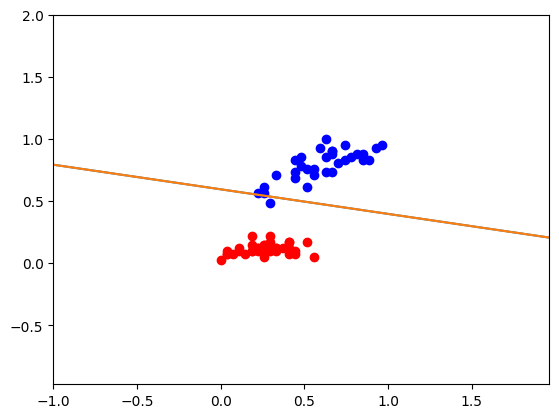

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


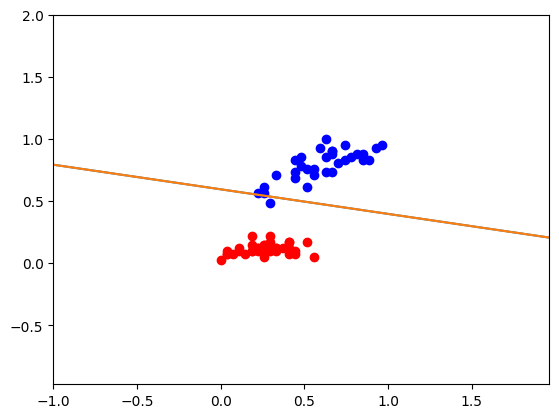

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


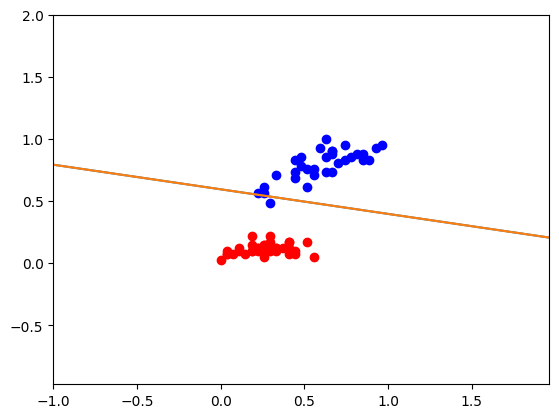

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


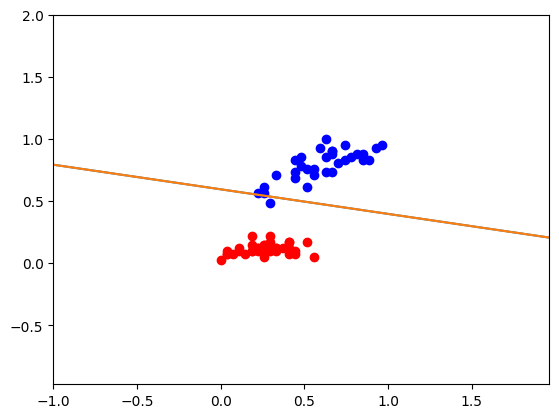

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


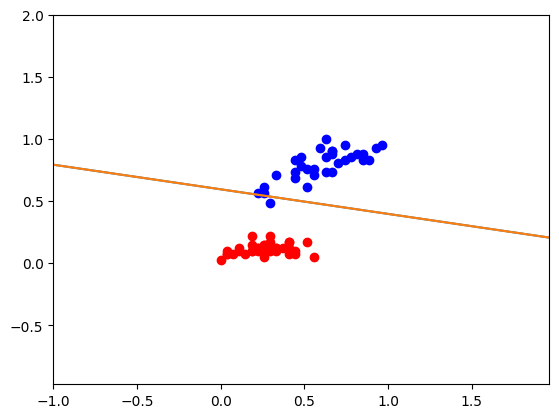

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


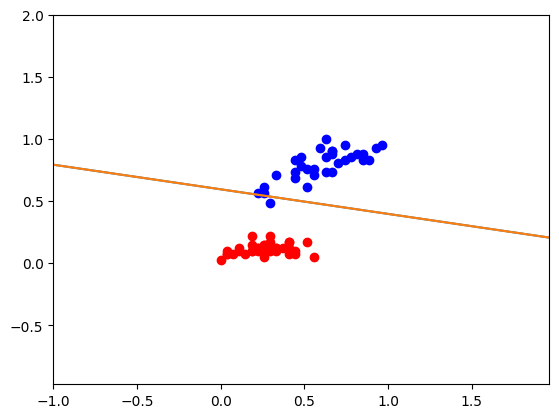

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


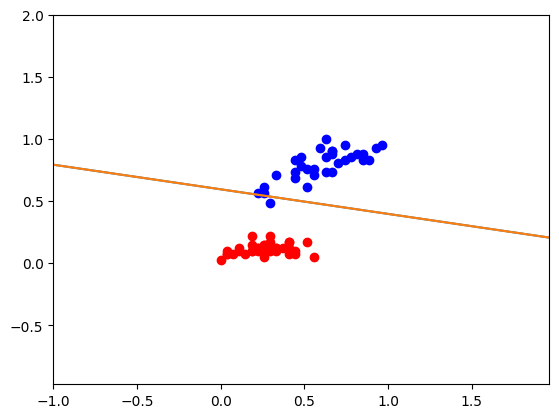

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


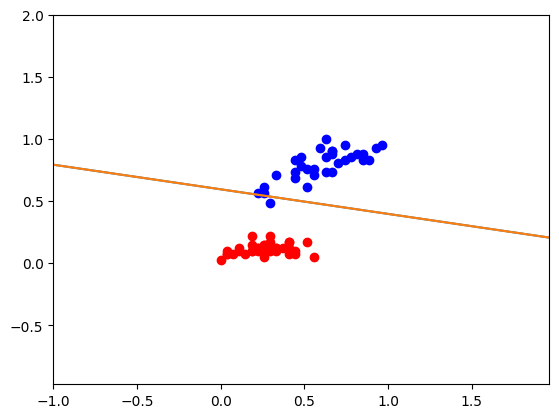

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


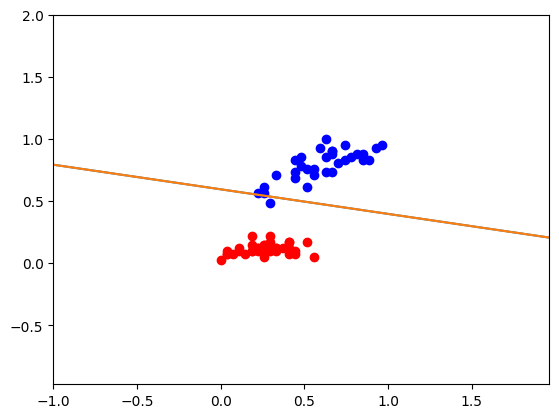

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


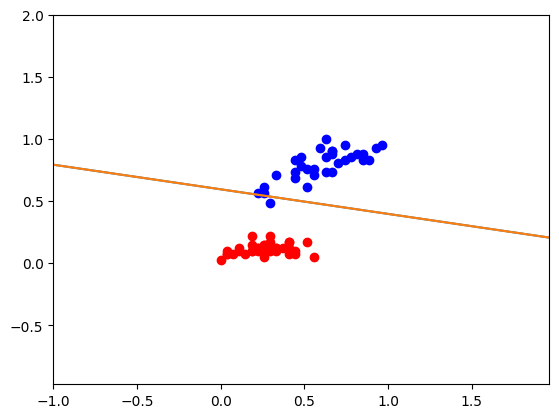

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


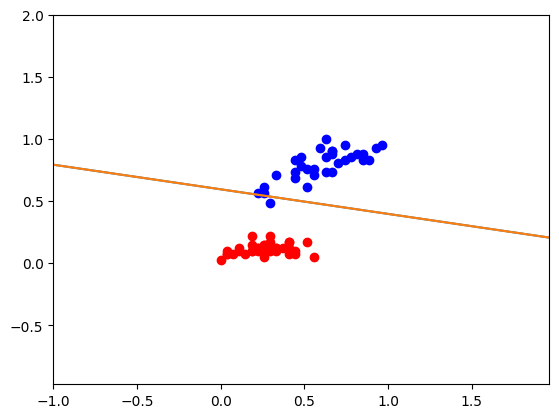

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


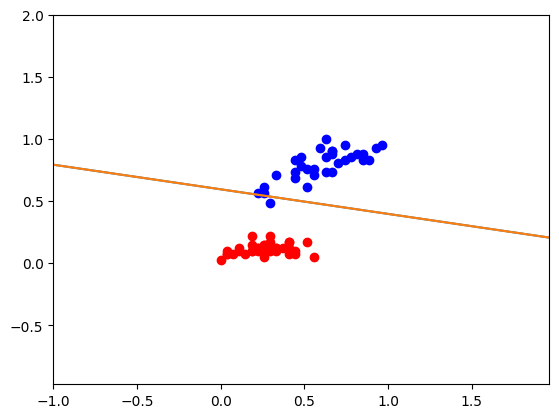


Epoch 2
Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


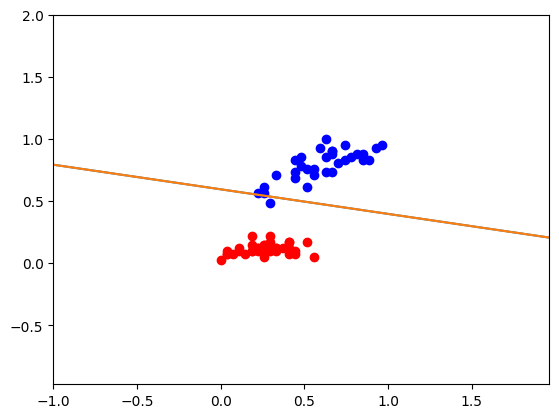

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


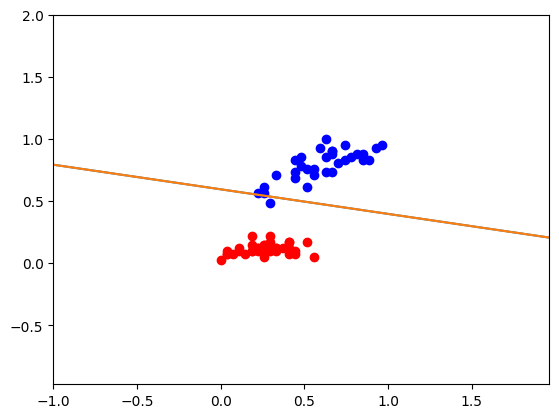

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


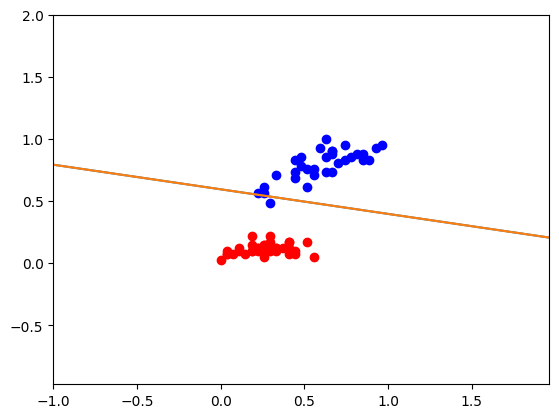

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


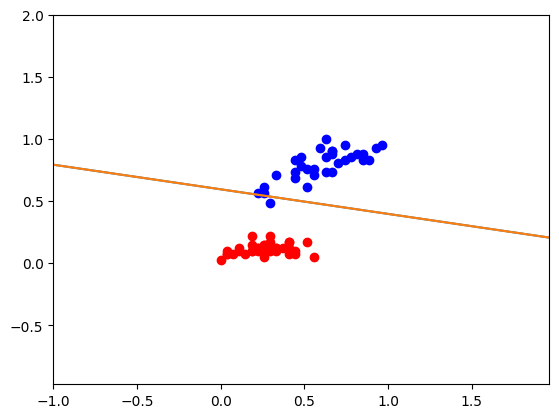

Bobot: [-1.0, 0.3333333333333337, 1.6829268292682928]


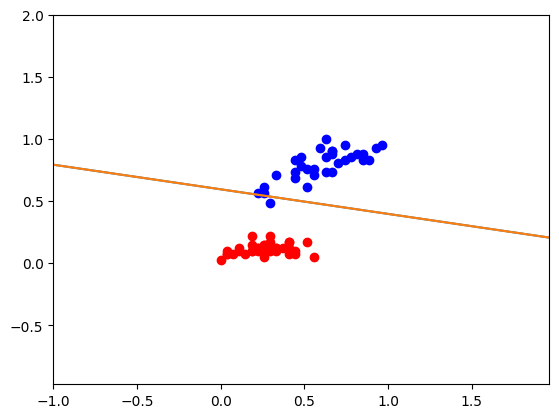

Bobot: [0.0, 0.62962962962963, 2.1707317073170733]


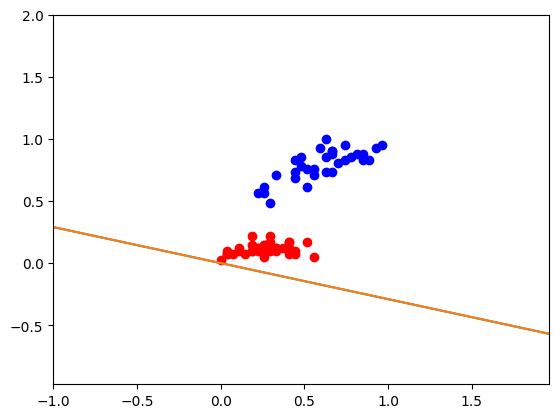

Bobot: [0.0, 0.62962962962963, 2.1707317073170733]


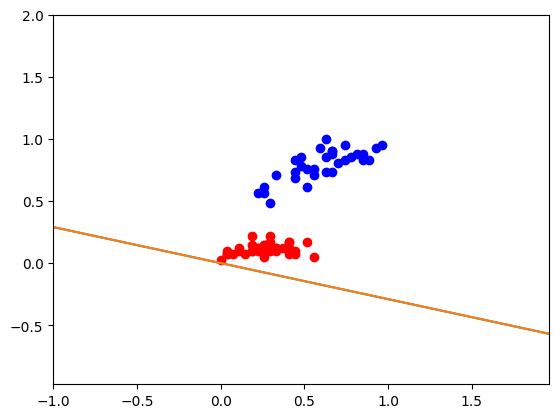

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


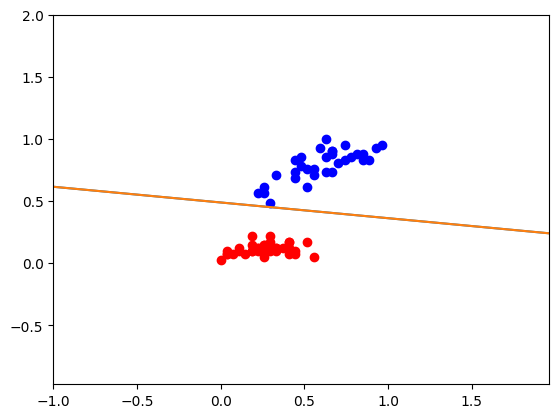

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


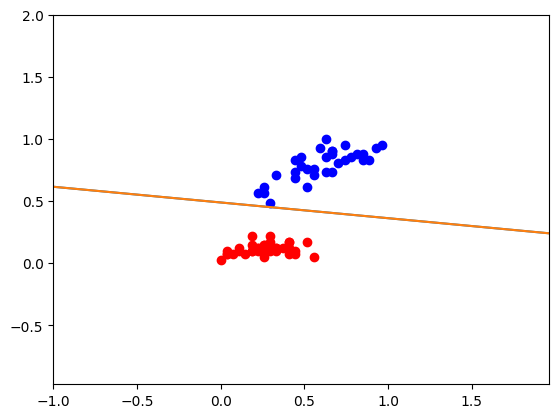

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


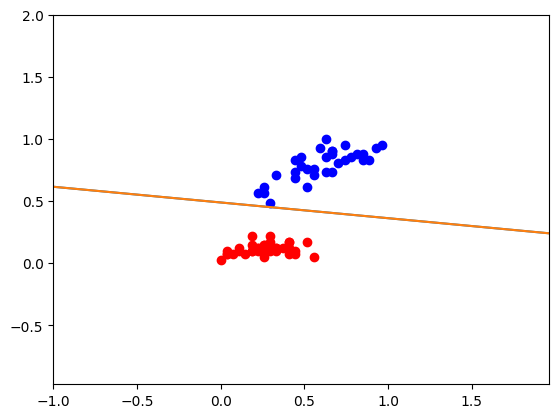

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


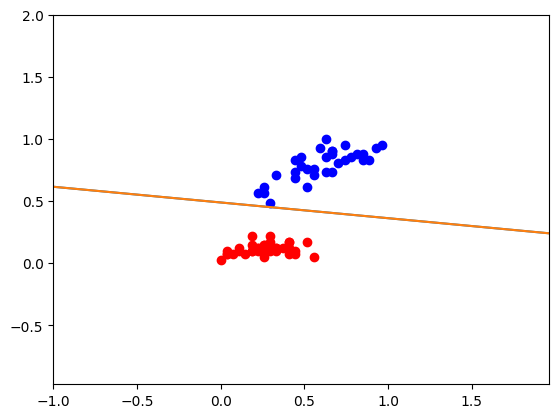

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


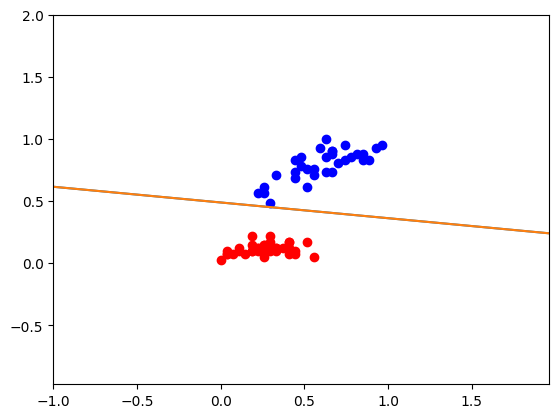

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


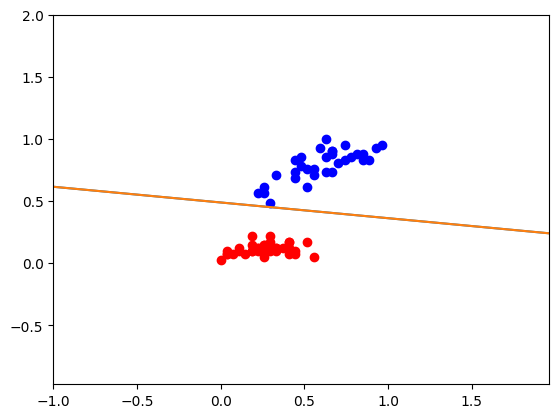

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


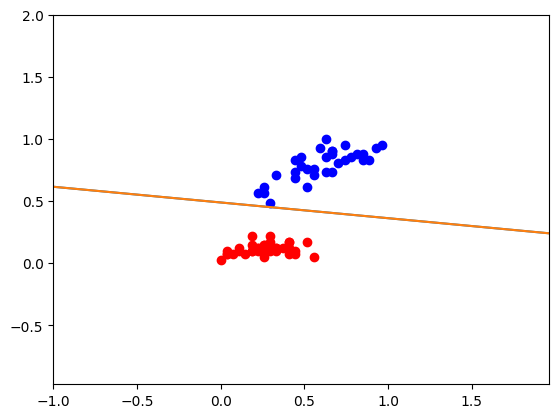

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


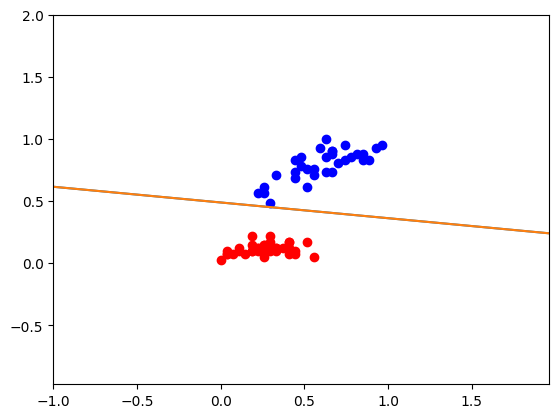

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


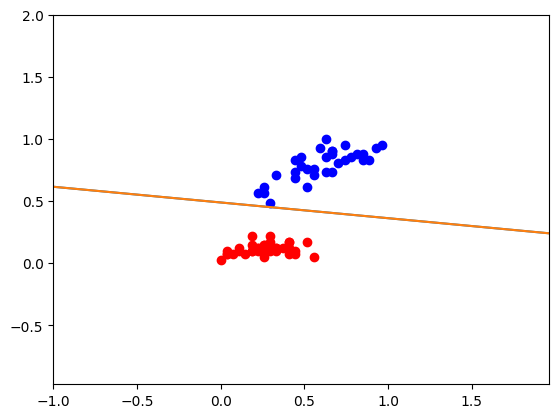

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


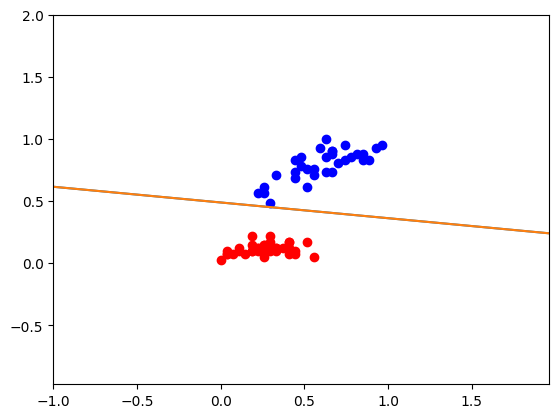

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


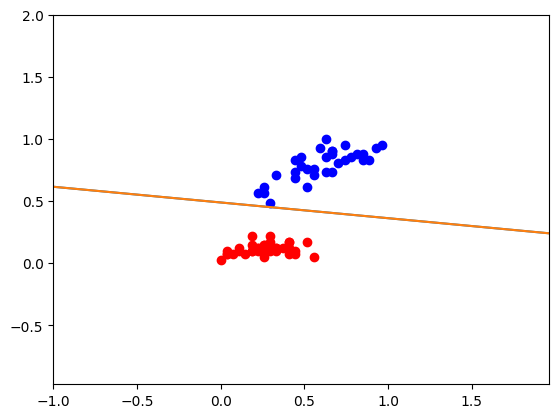

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


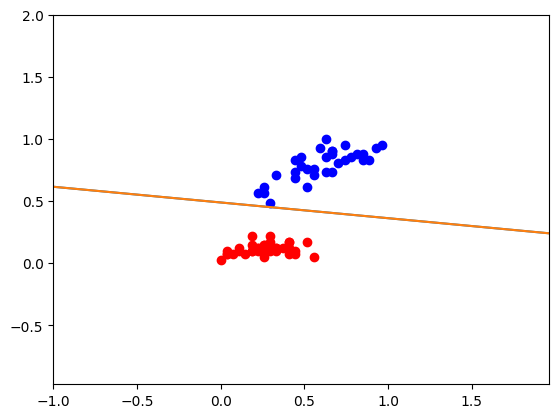

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


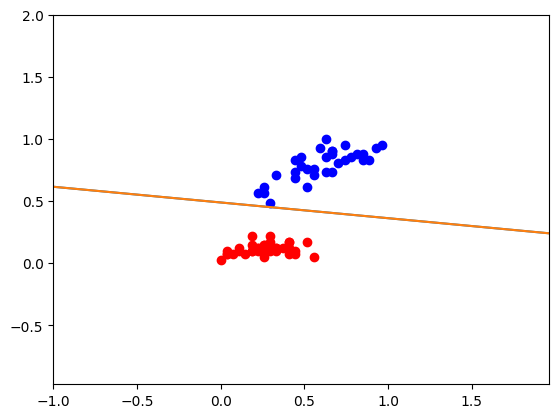

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


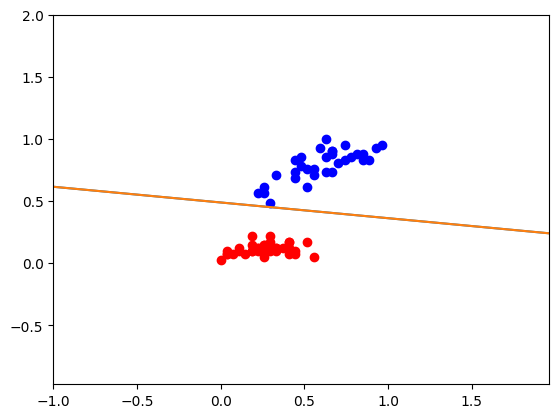

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


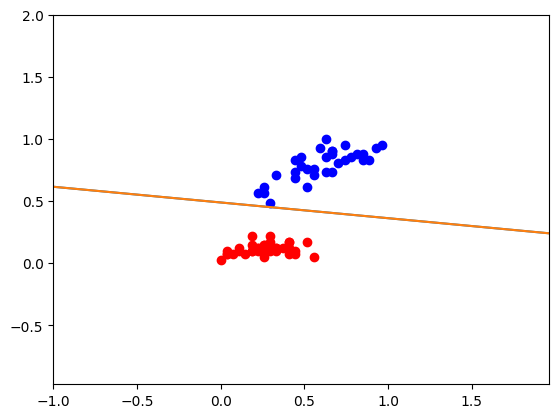

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


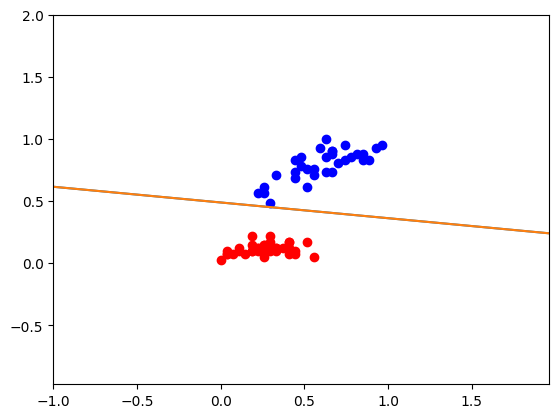

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


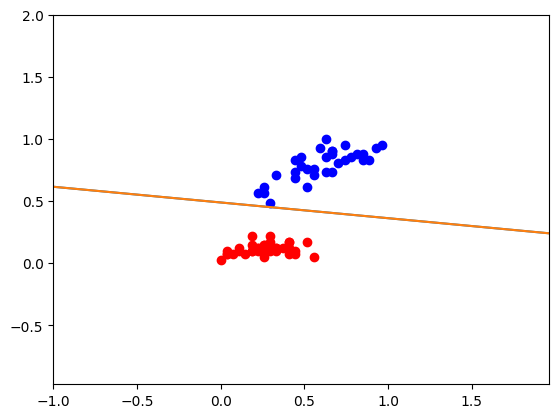

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


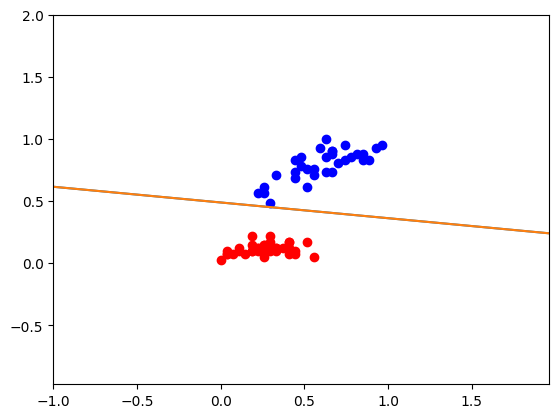

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


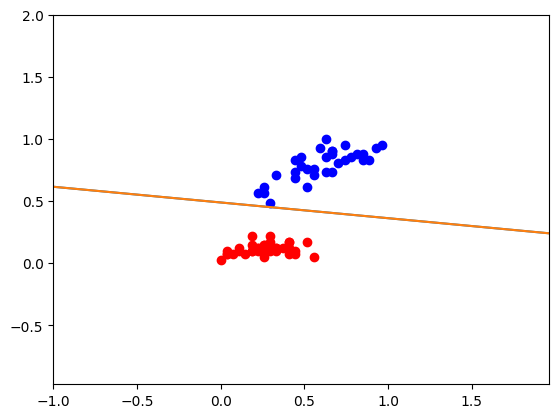

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


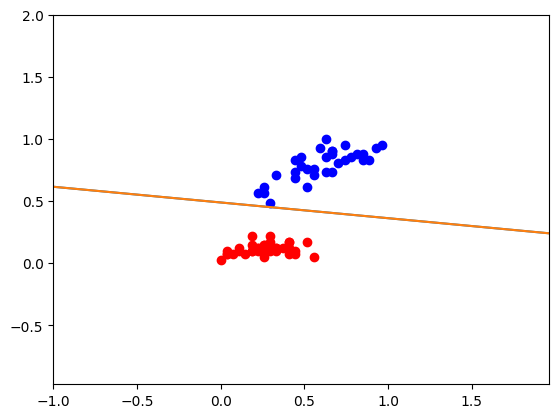

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


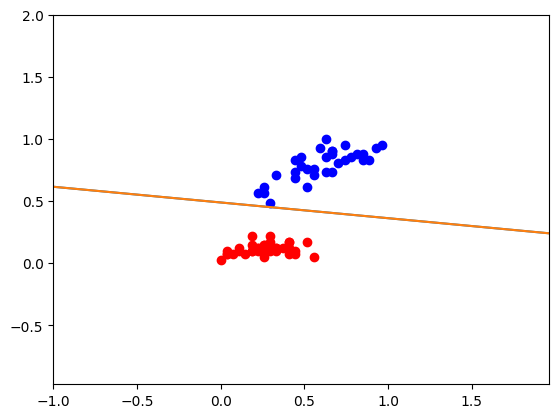

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


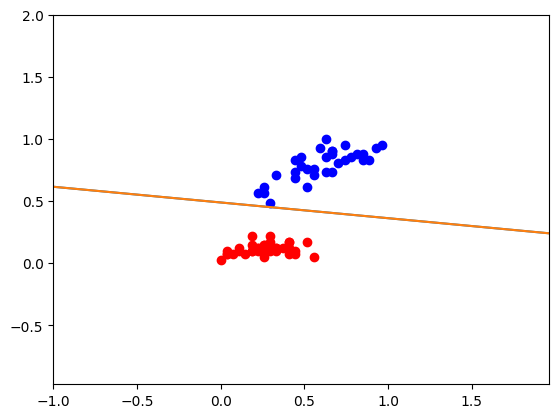

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


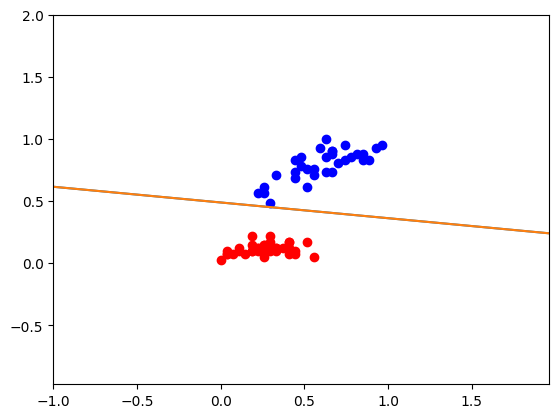

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


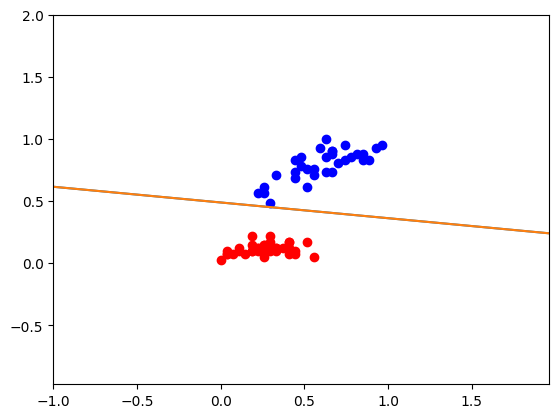

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


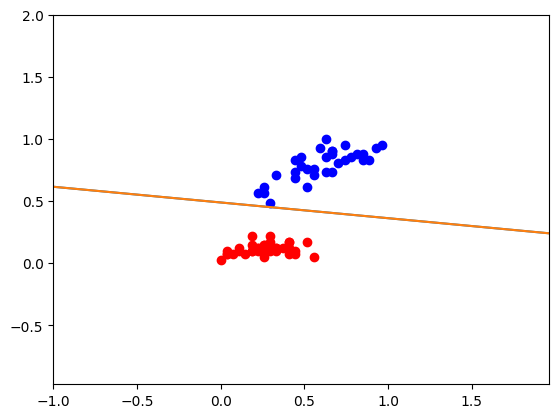

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


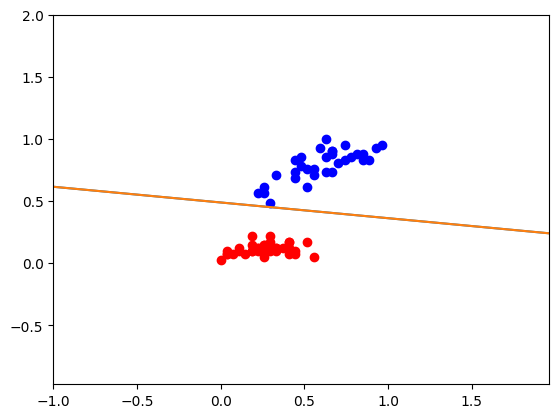

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


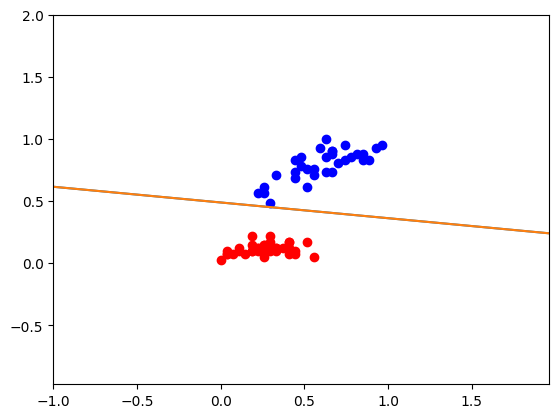

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


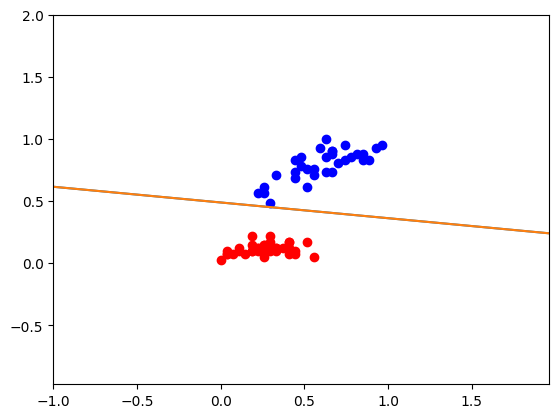

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


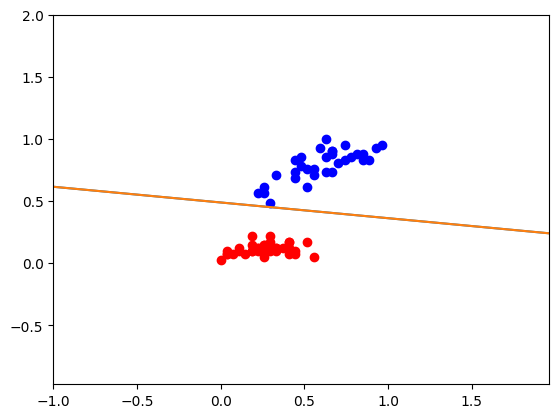

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


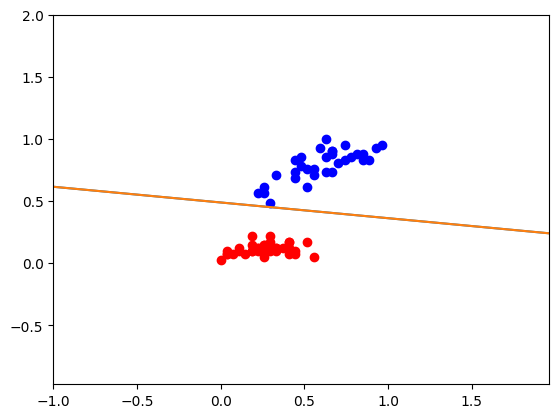

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


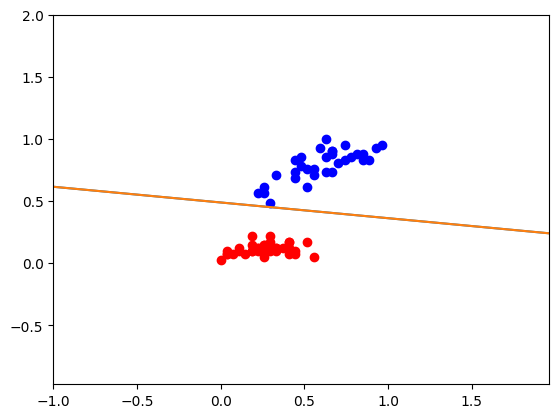

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


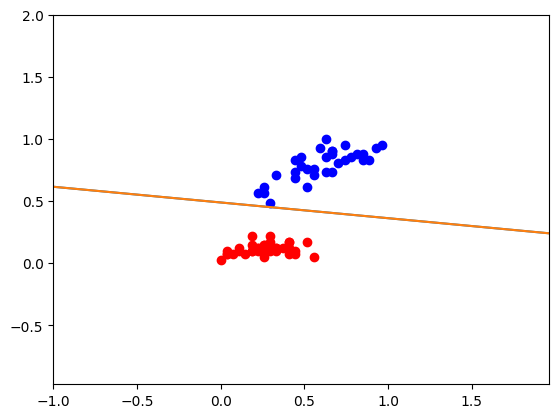

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


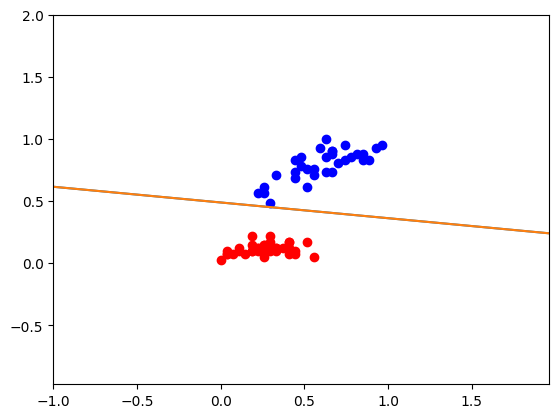

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


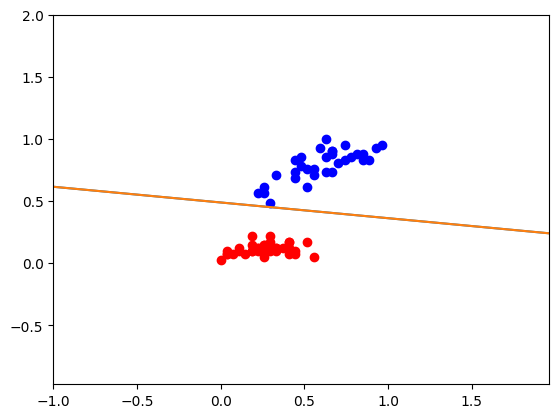

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


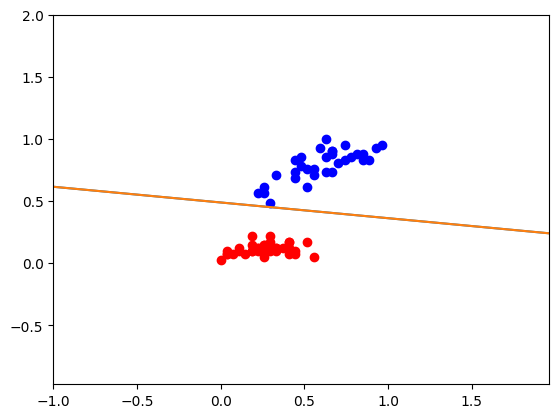

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


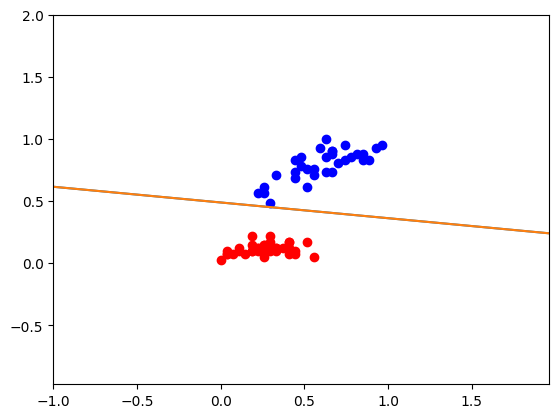

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


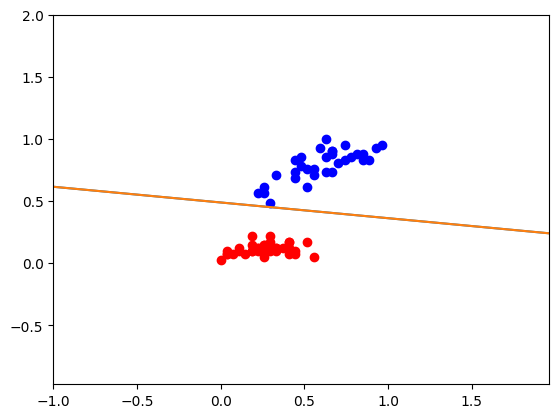

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


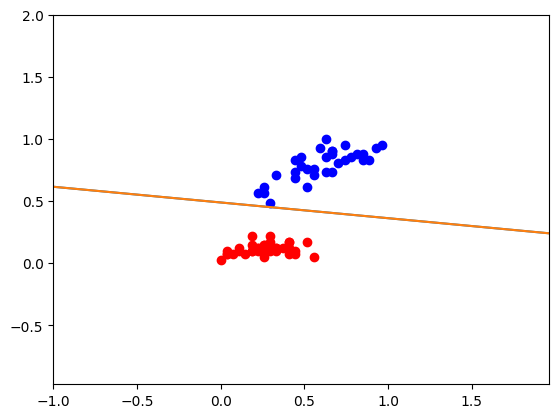

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


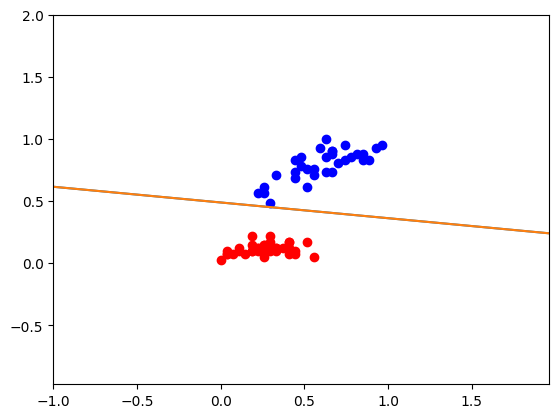

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


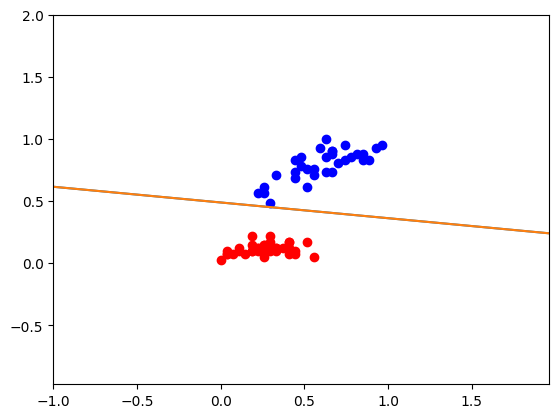

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


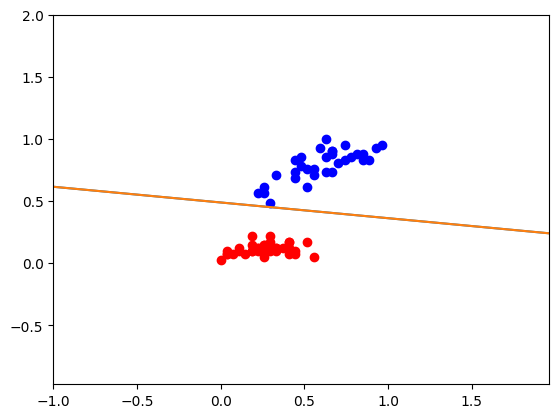

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


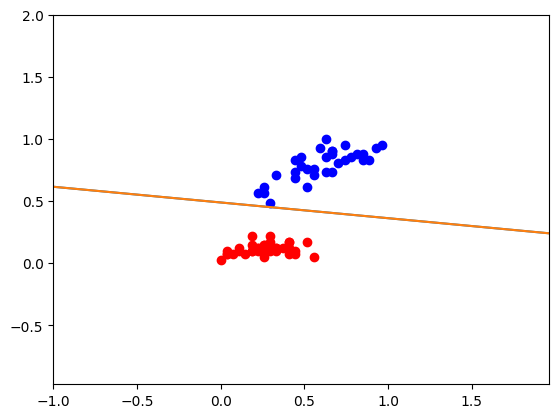

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


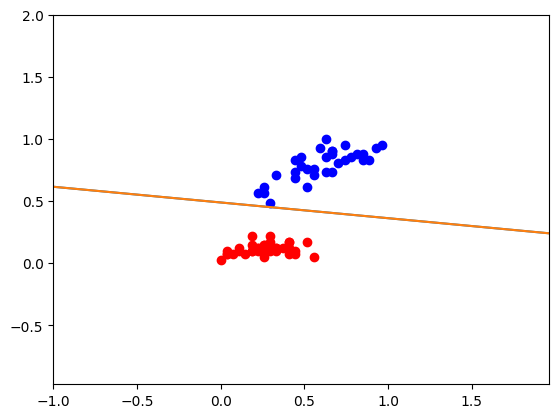

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


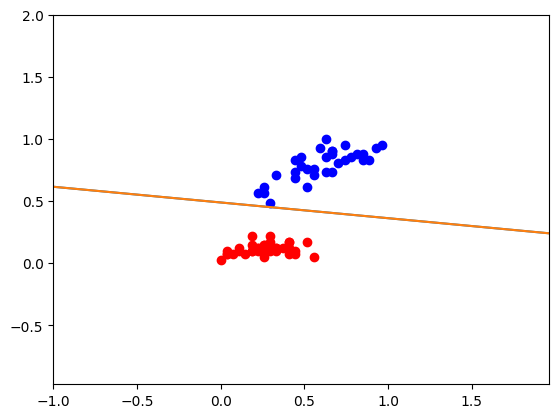

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


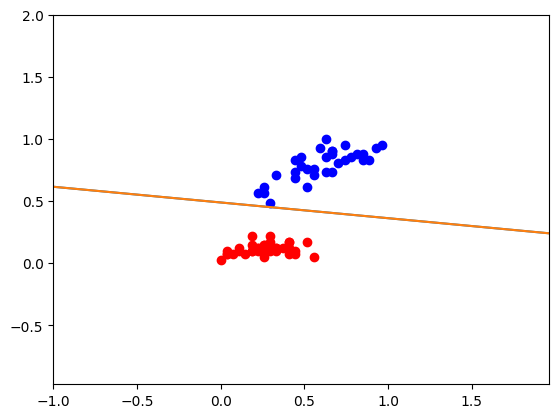

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


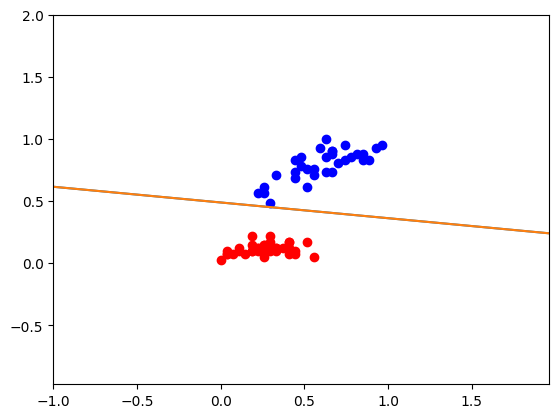

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


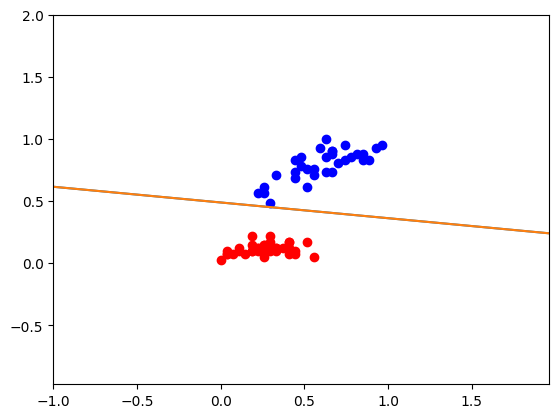

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


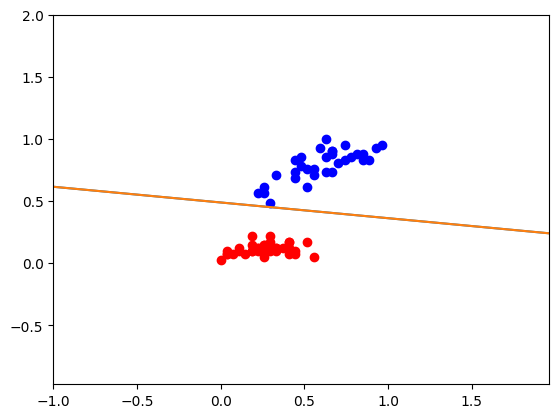

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


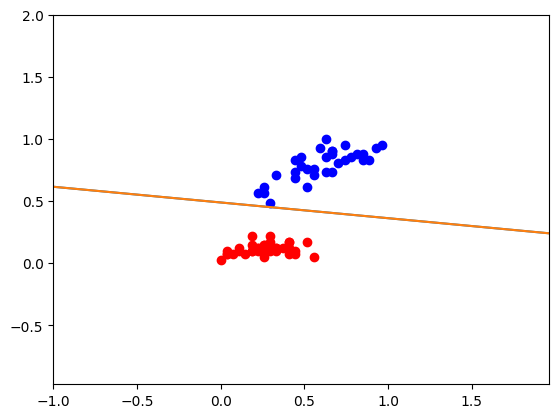

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


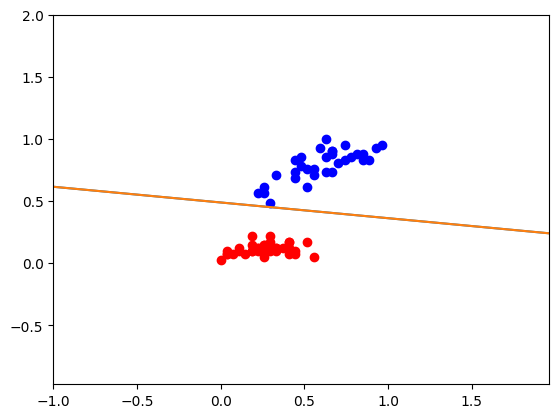

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


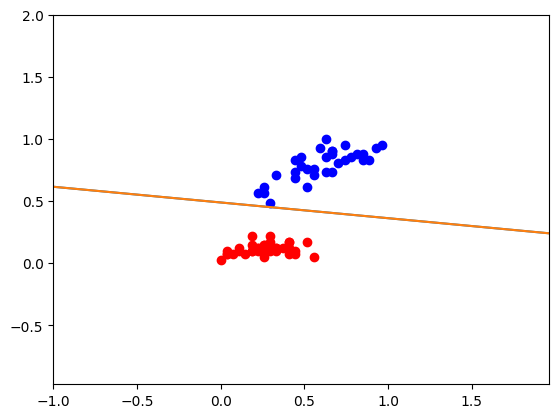

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


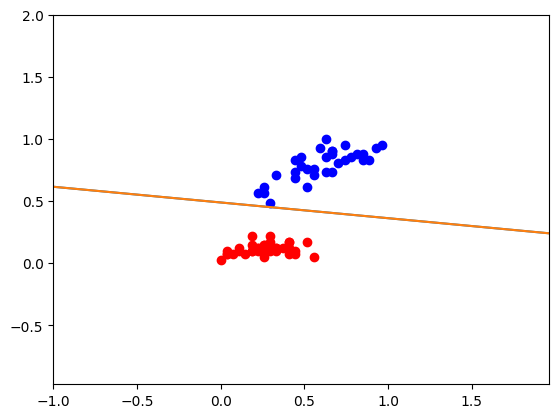

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


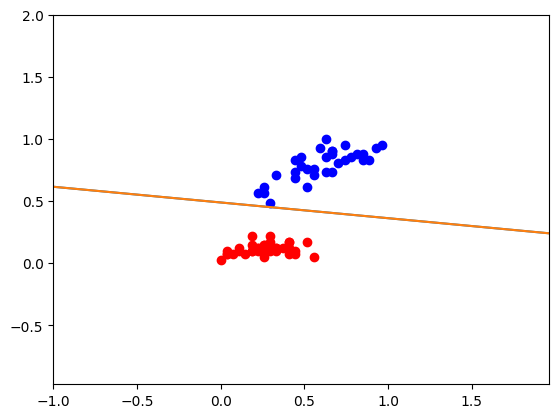

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


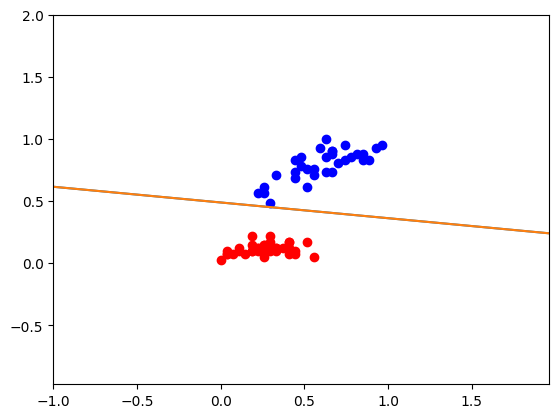

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


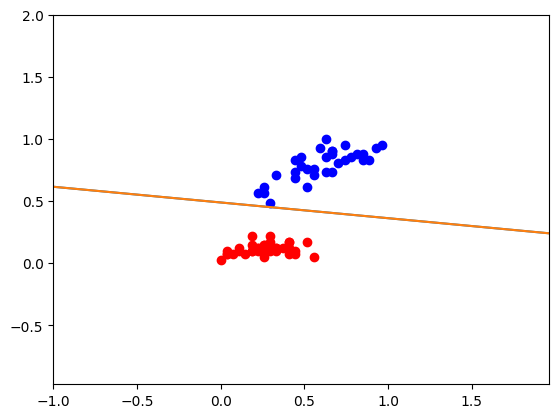

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


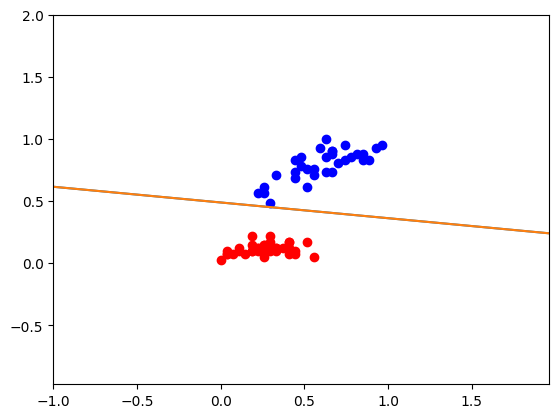

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


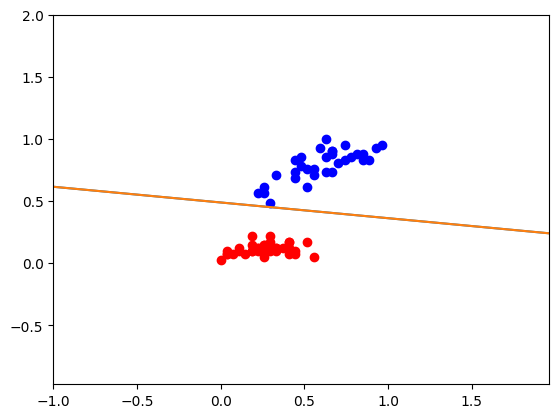

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


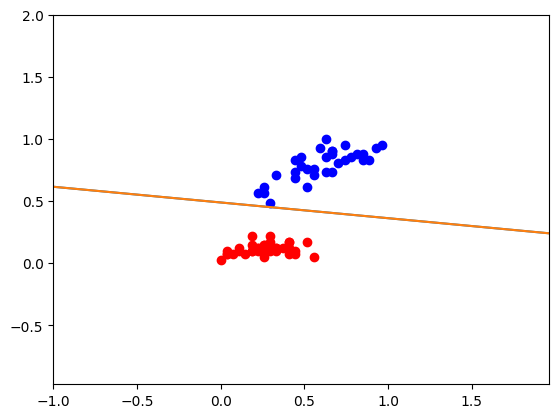

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


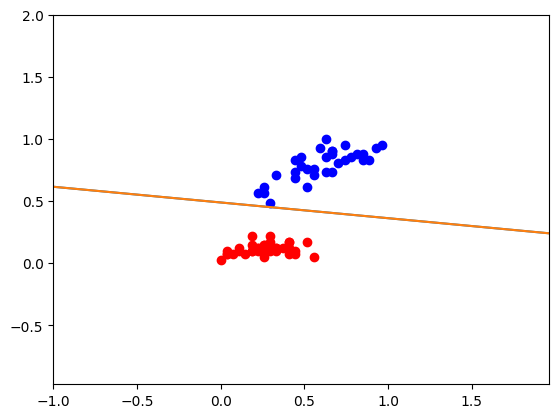

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


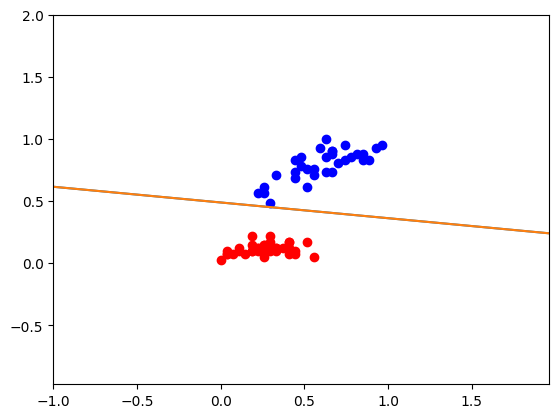

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


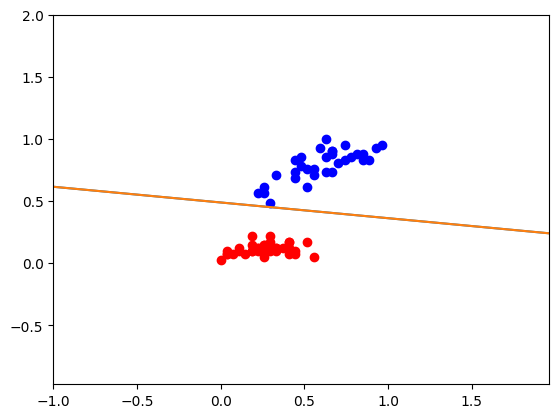

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


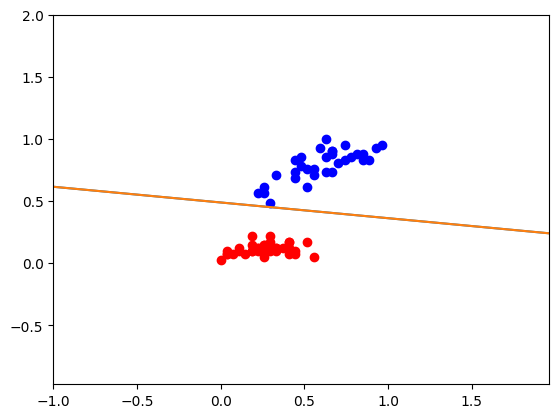

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


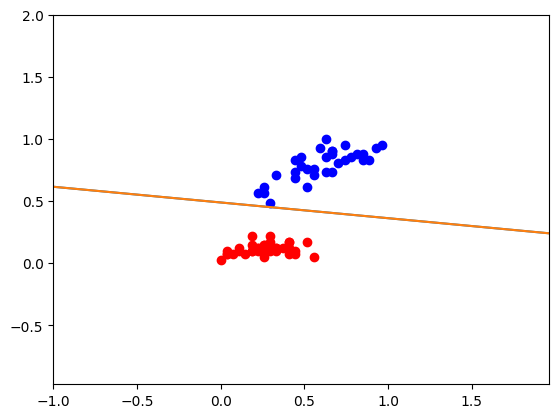


Epoch 3
Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


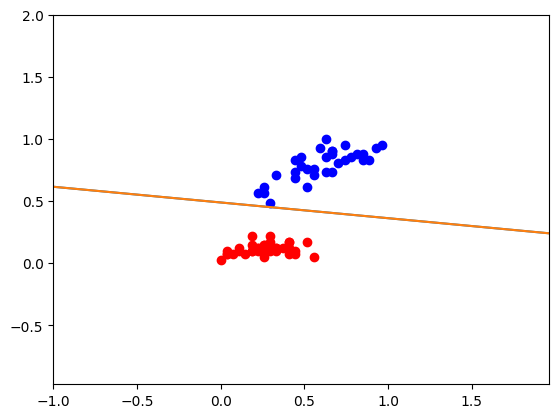

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


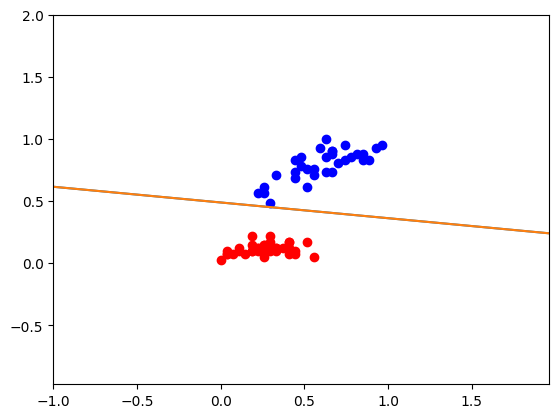

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


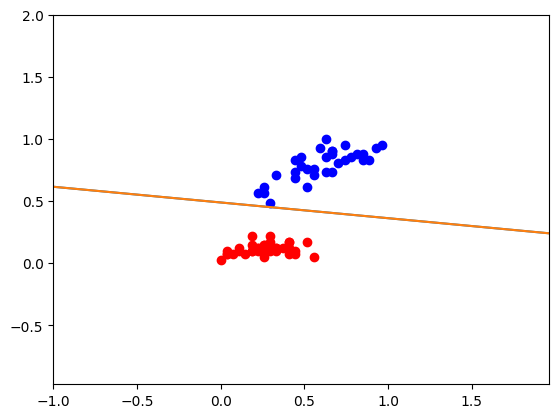

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


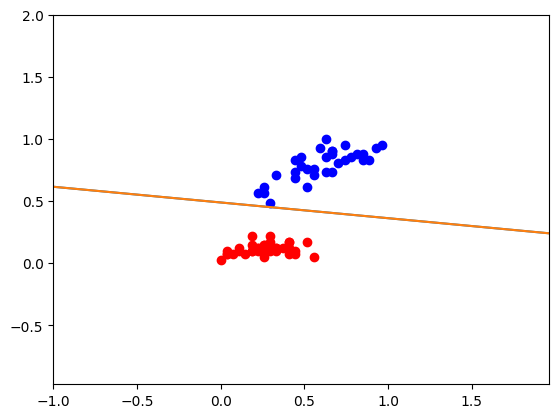

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


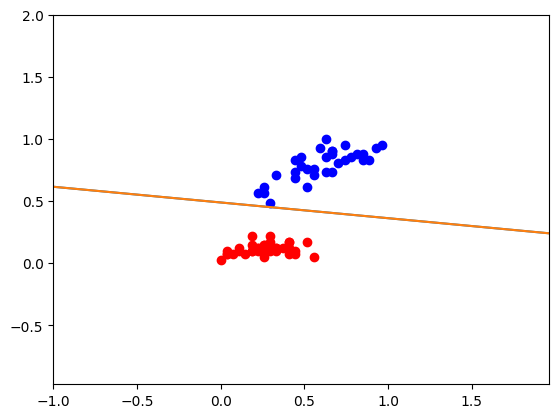

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


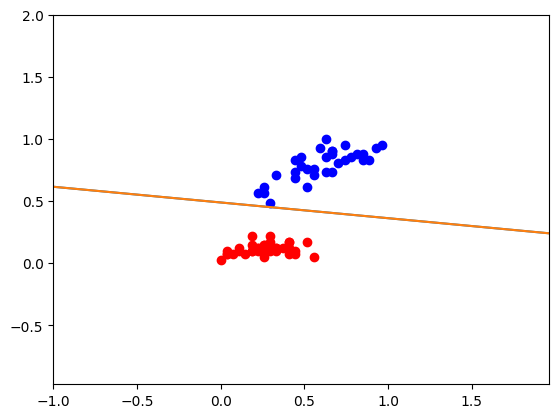

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


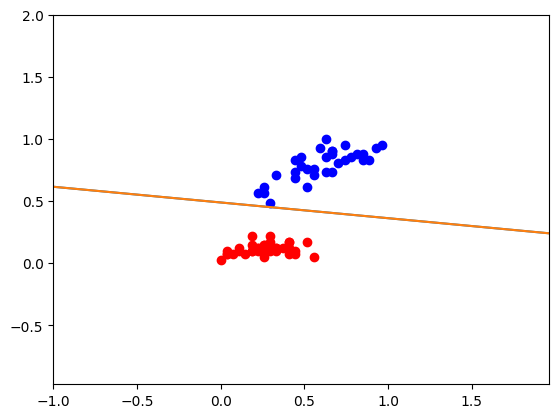

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


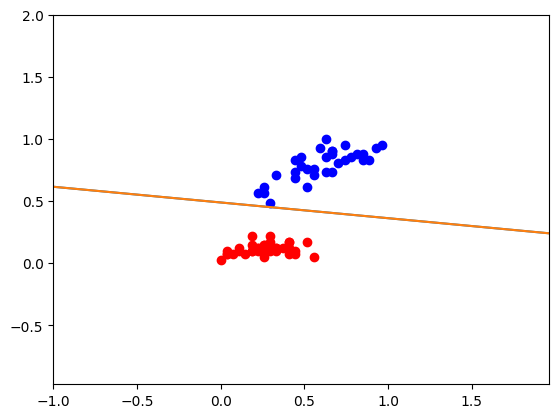

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


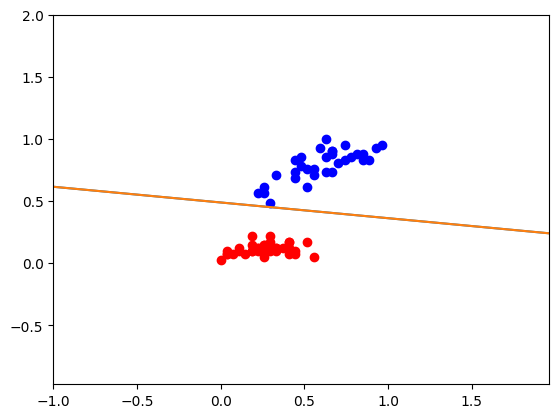

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


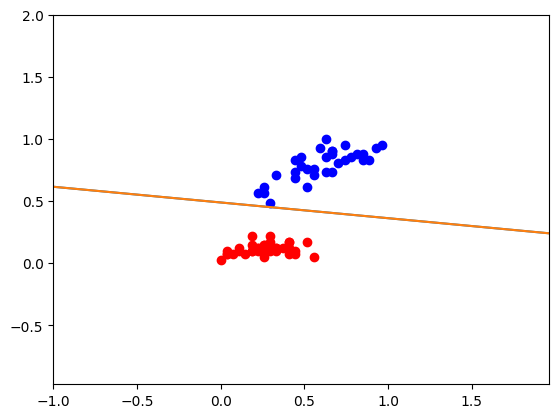

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


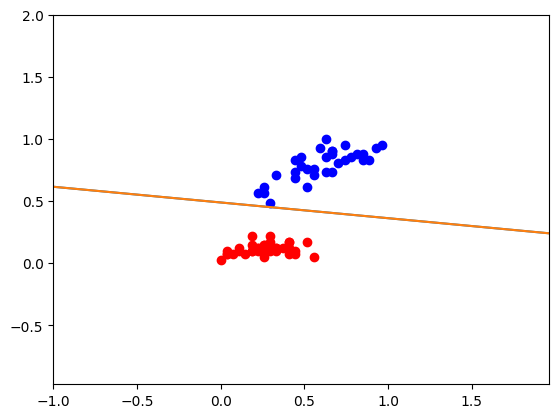

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


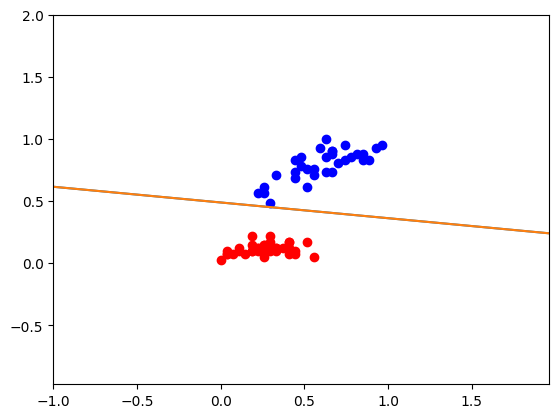

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


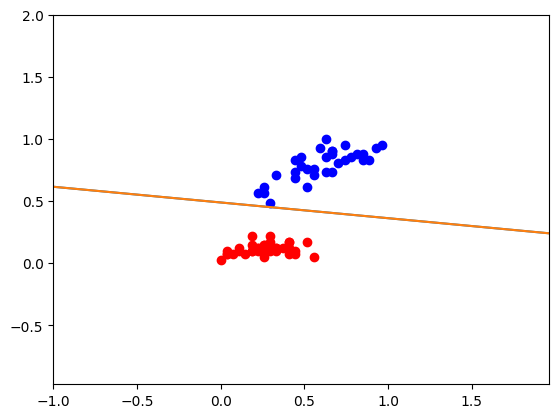

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


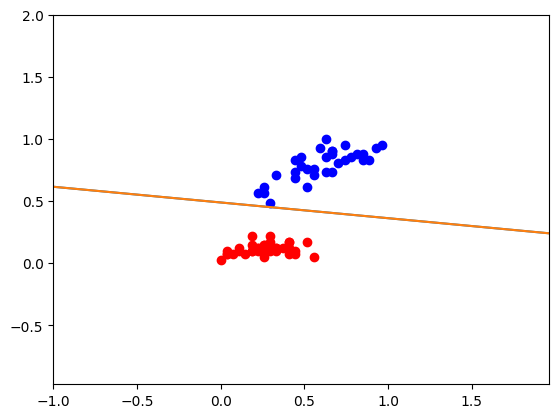

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


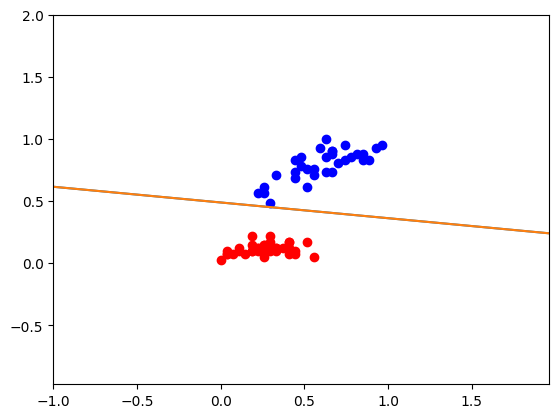

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


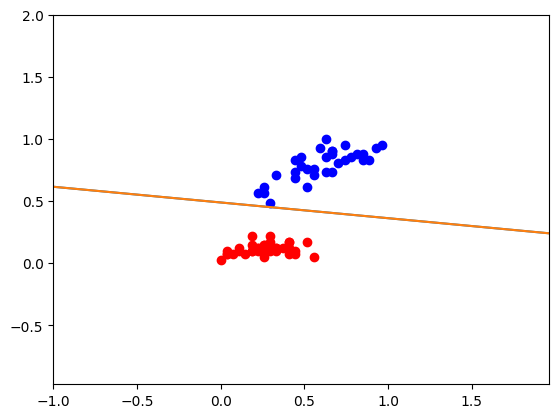

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


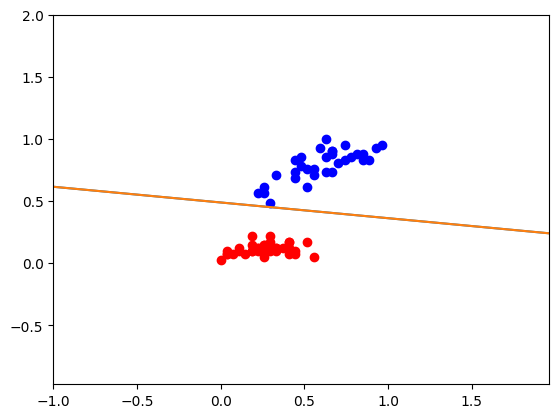

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


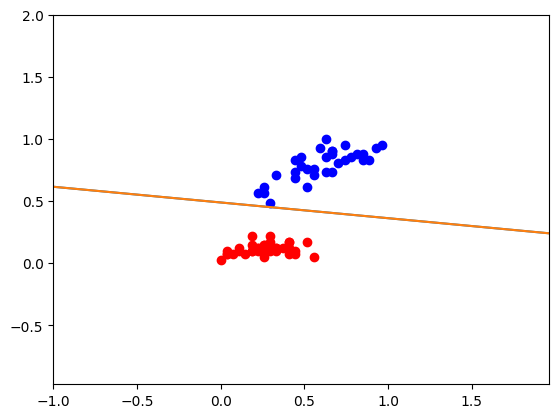

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


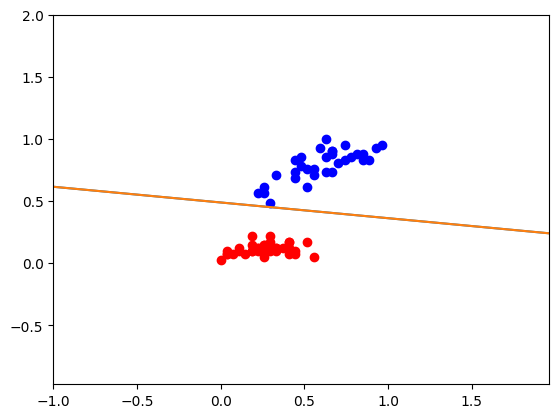

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


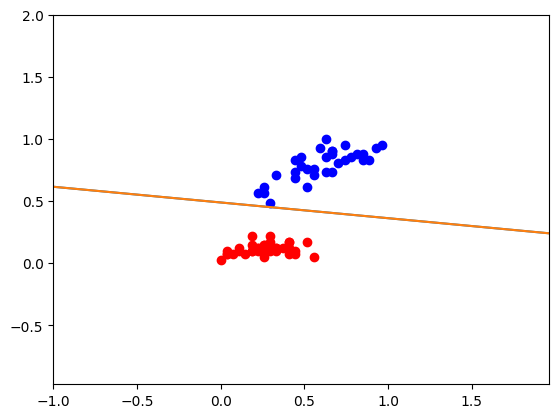

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


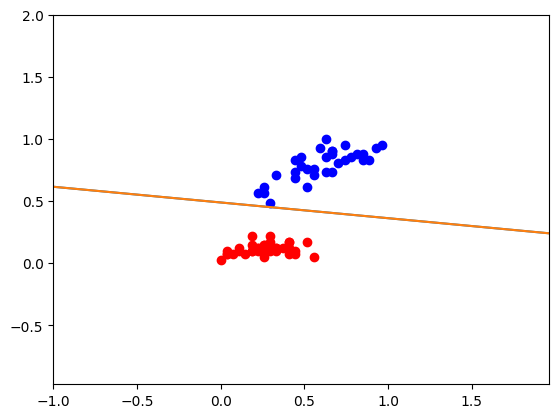

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


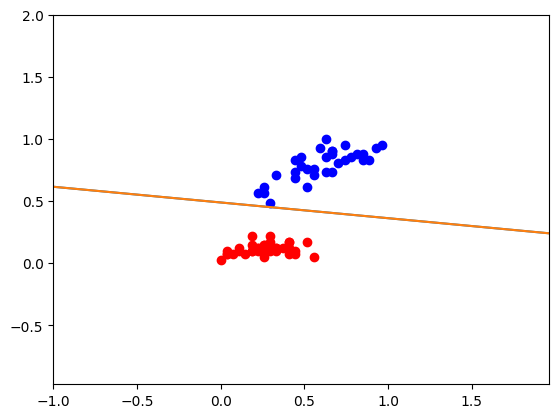

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


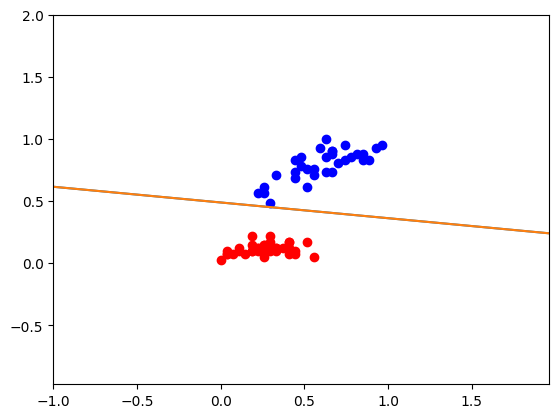

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


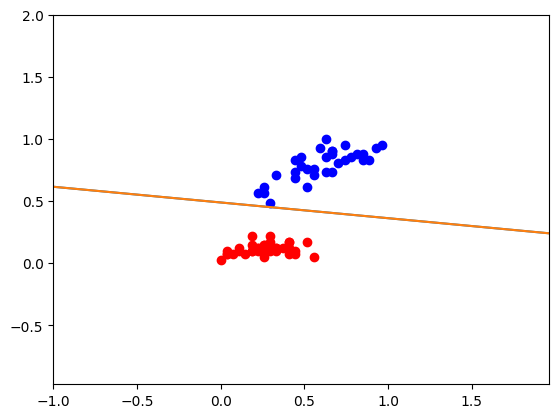

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


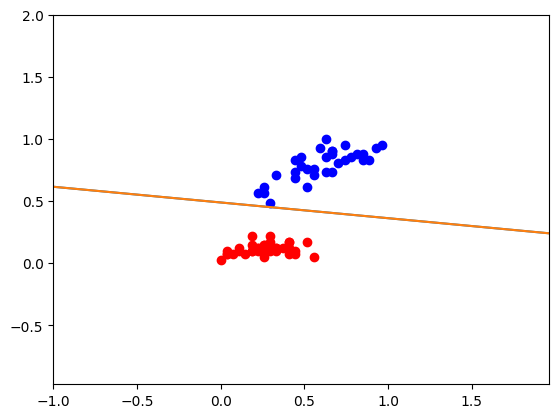

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


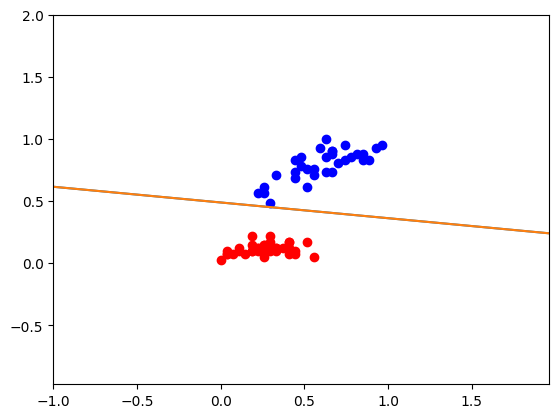

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


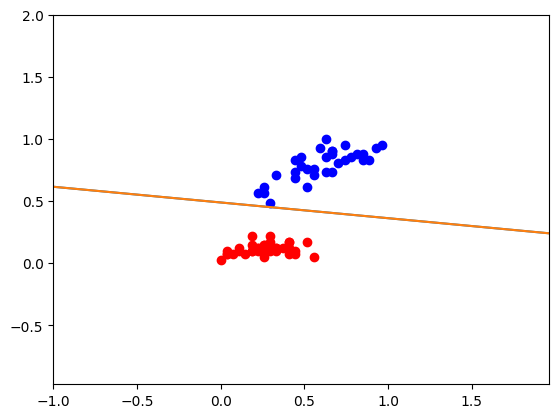

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


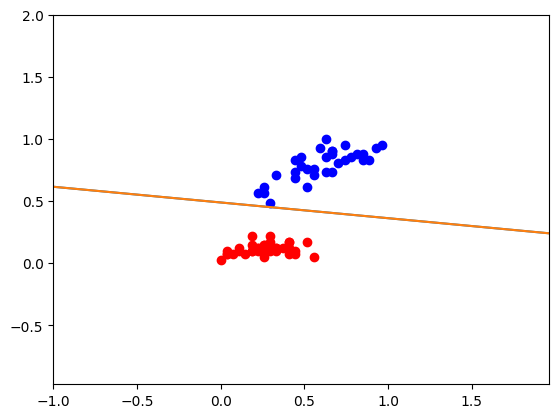

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


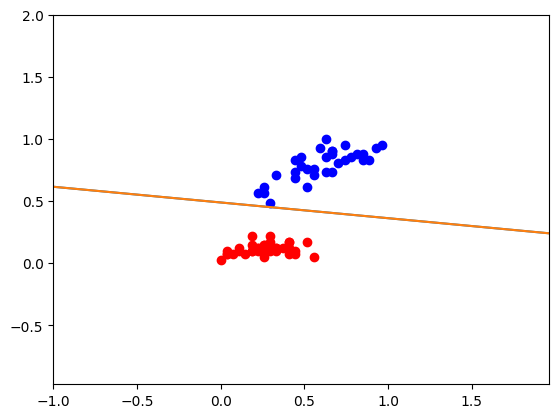

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


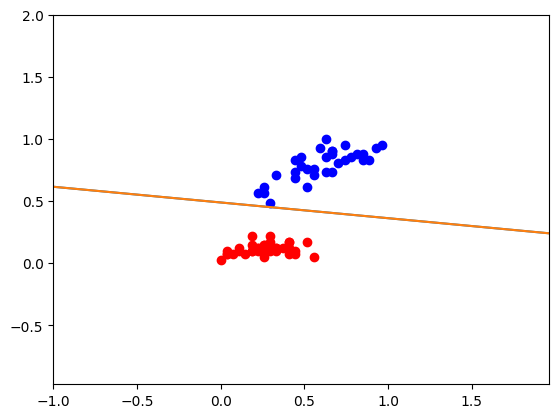

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


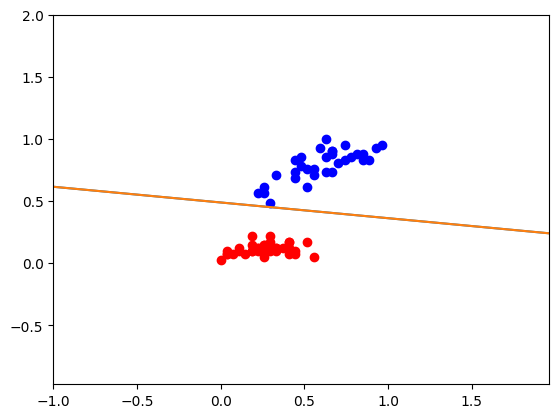

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


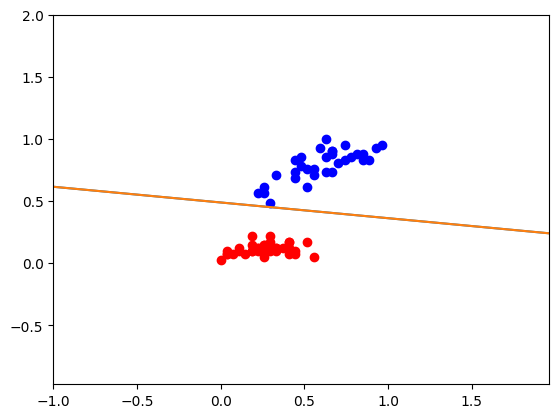

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


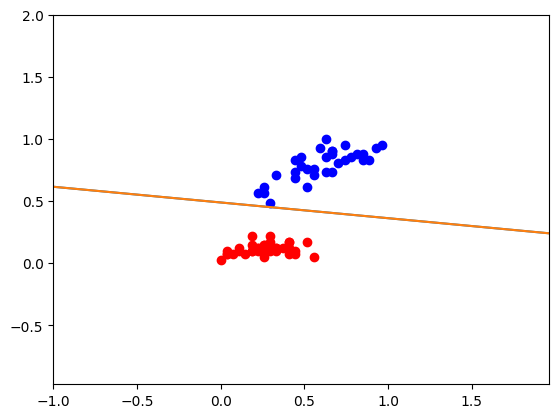

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


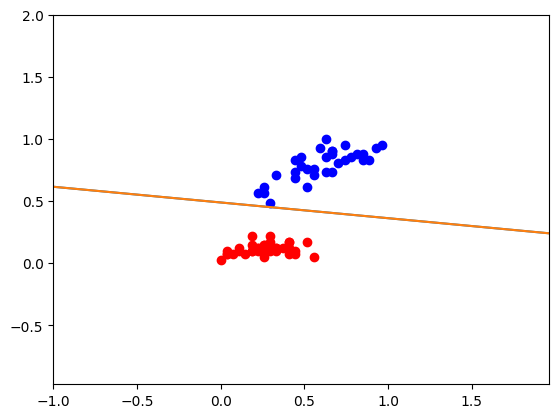

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


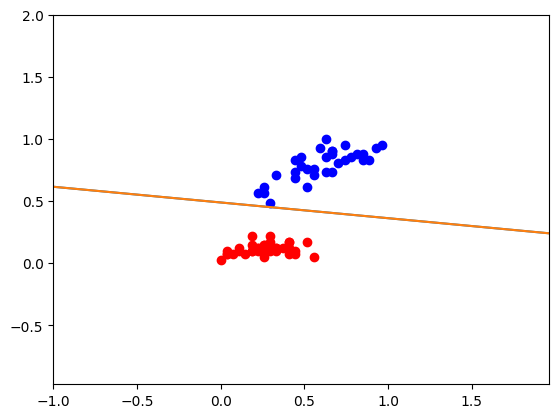

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


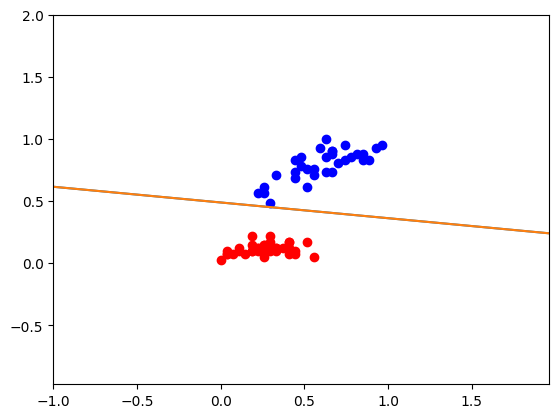

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


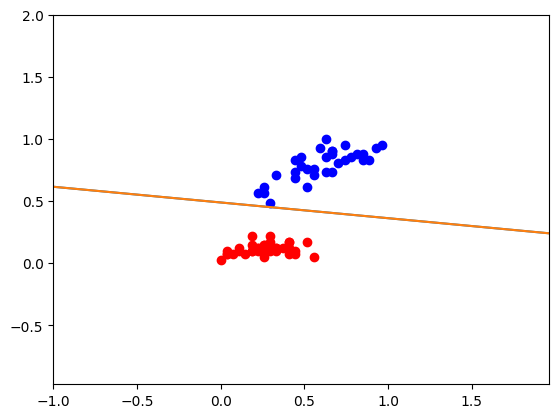

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


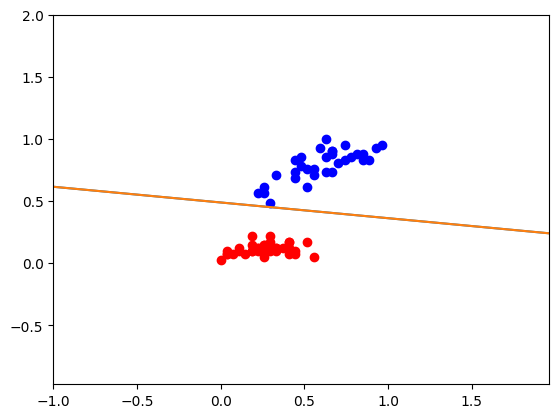

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


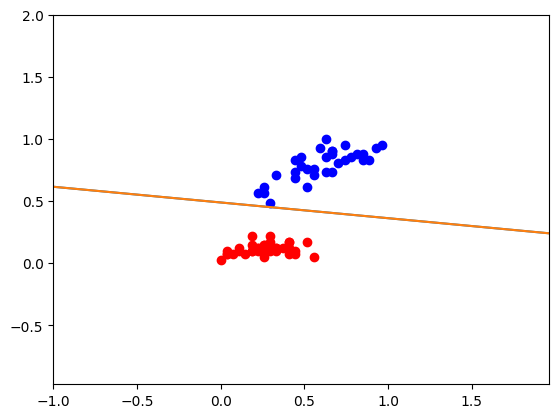

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


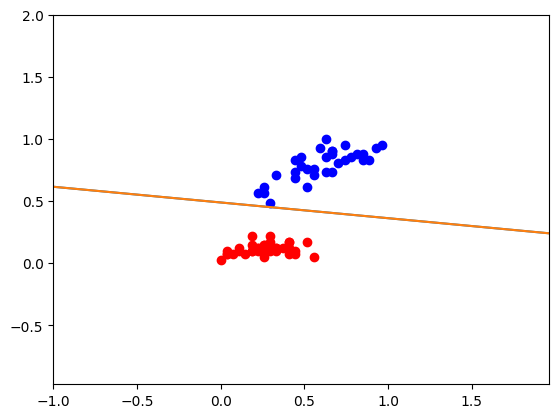

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


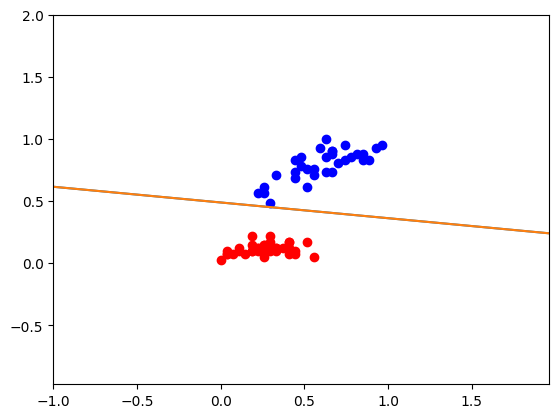

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


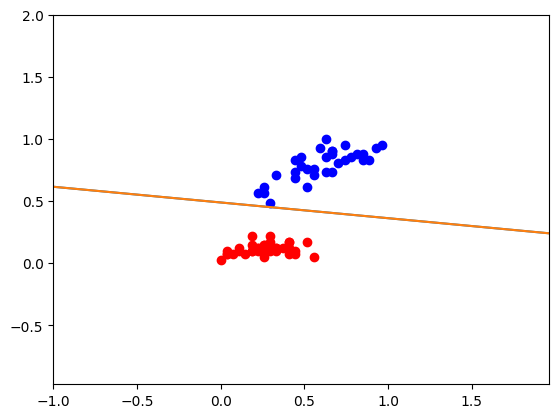

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


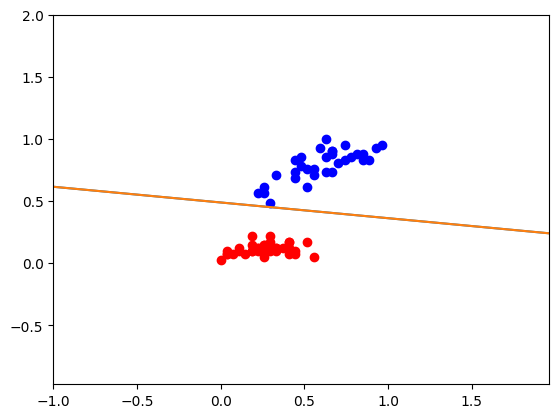

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


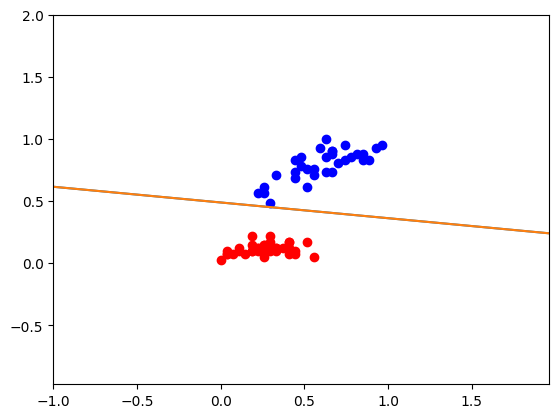

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


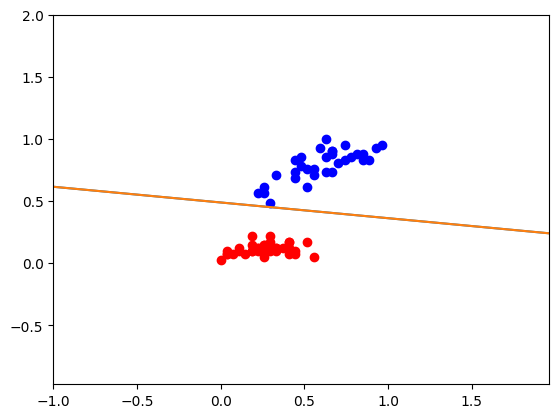

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


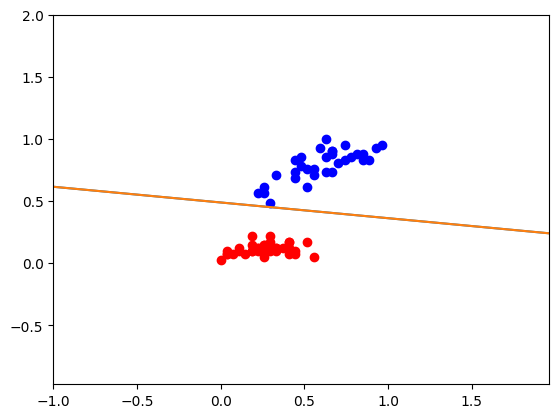

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


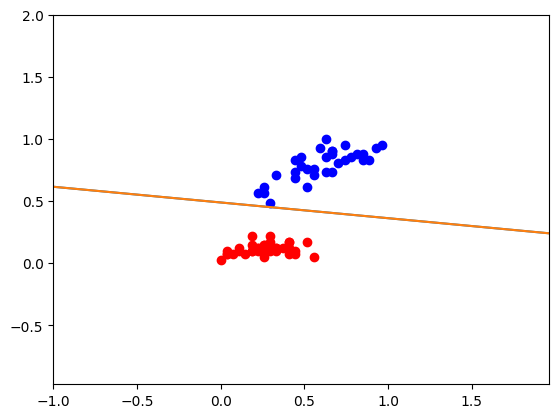

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


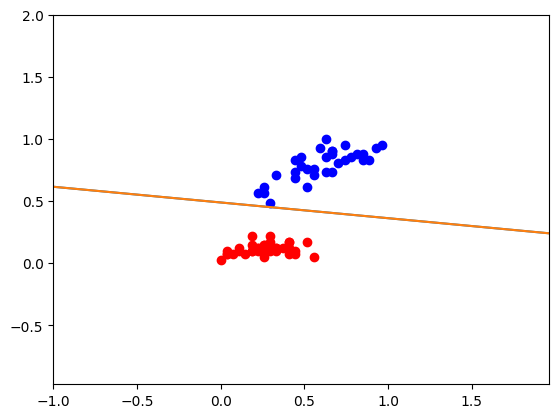

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


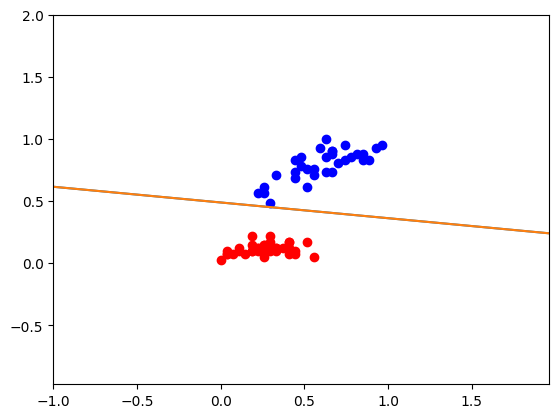

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


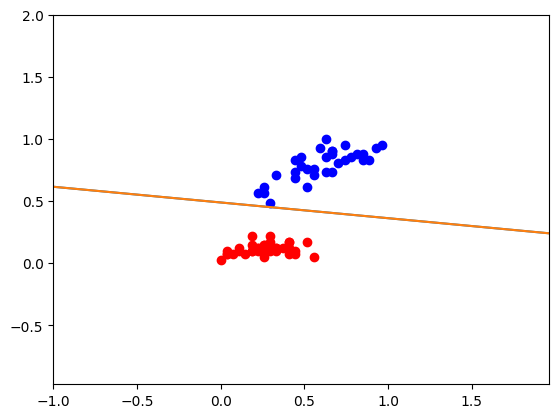

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


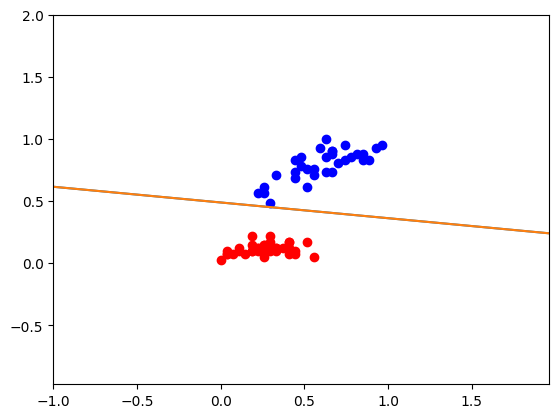

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


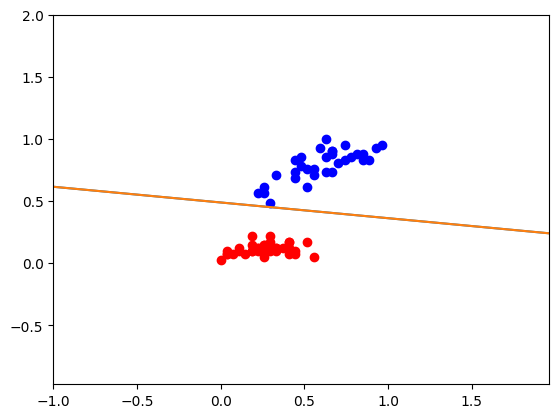

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


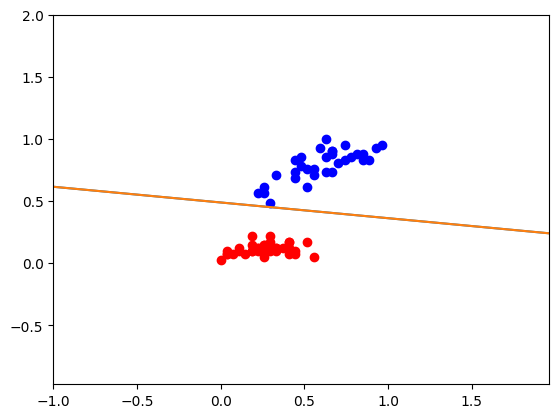

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


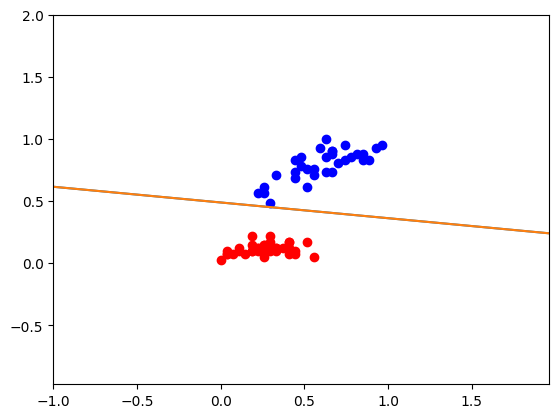

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


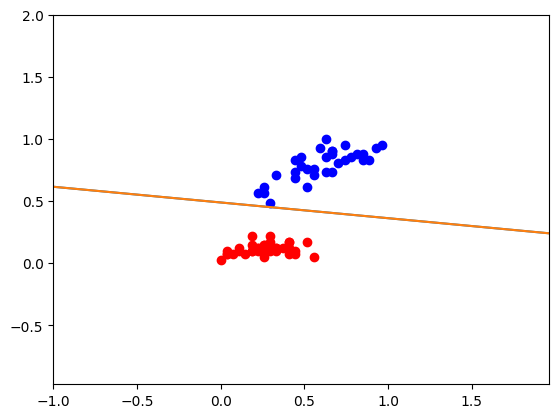

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


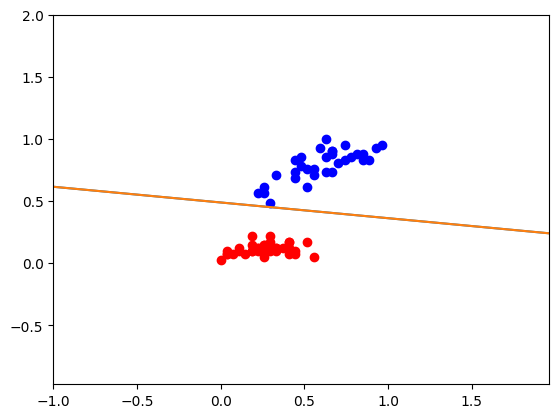

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


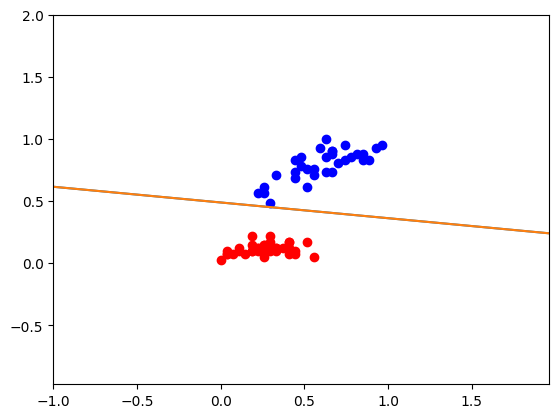

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


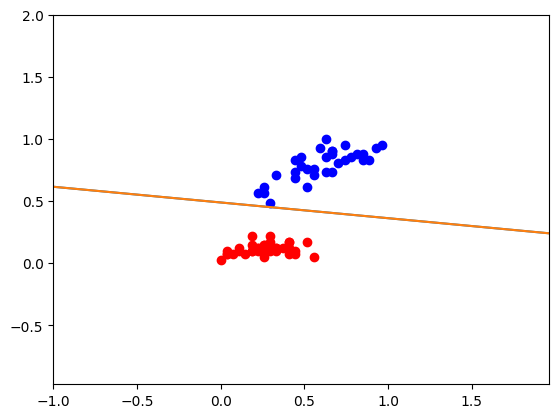

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


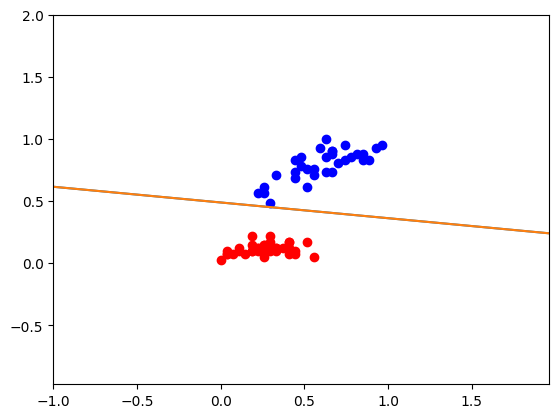

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


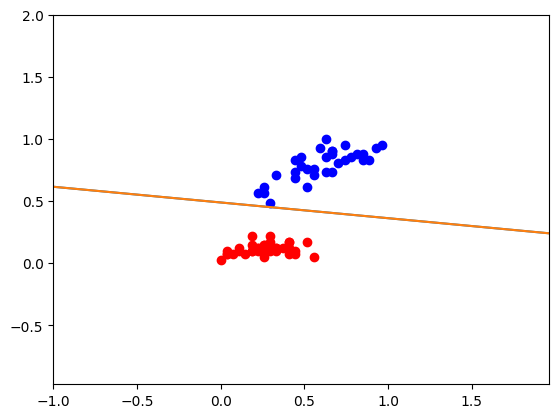

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


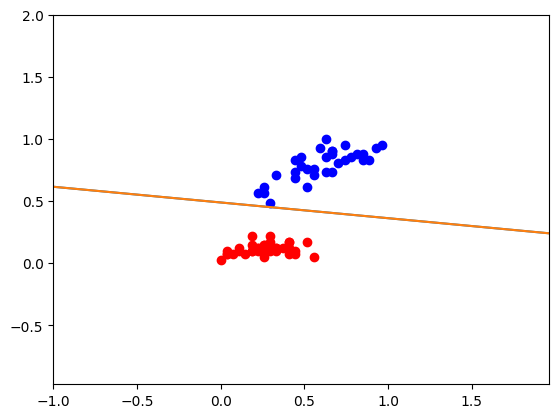

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


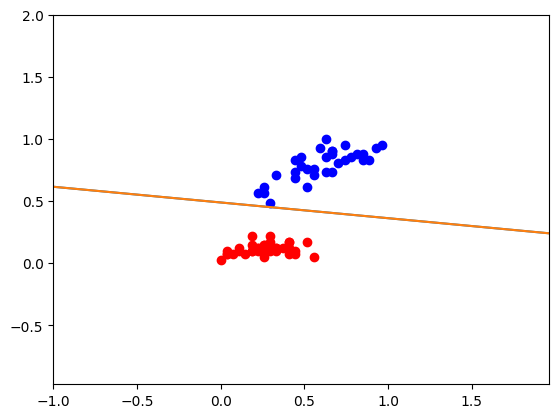

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


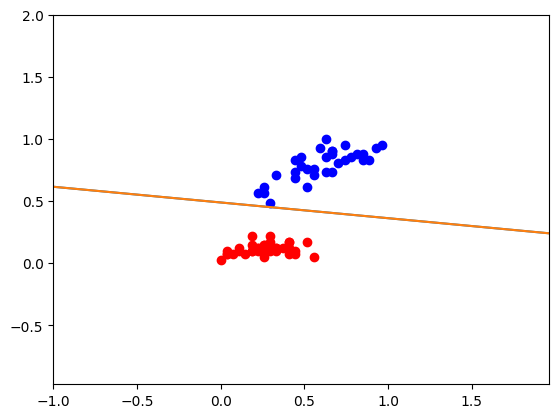

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


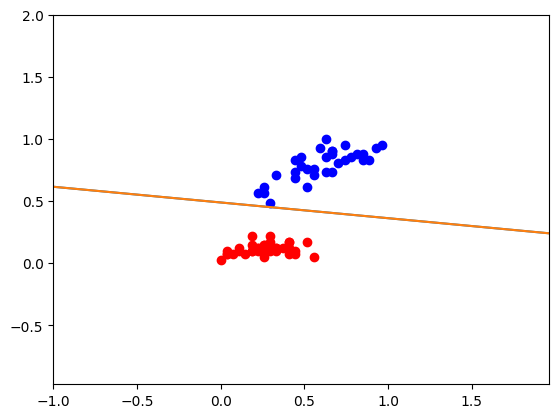

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


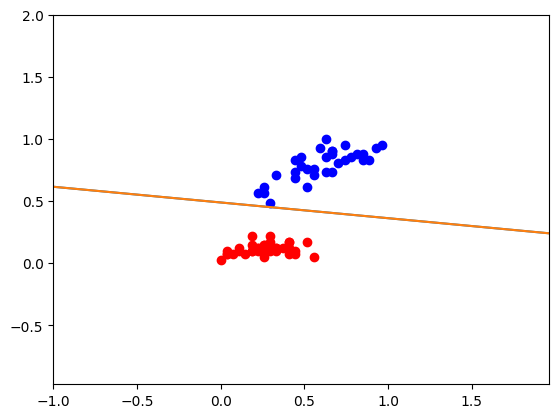

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


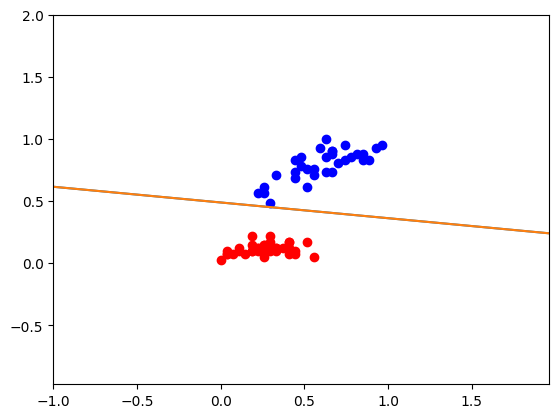

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


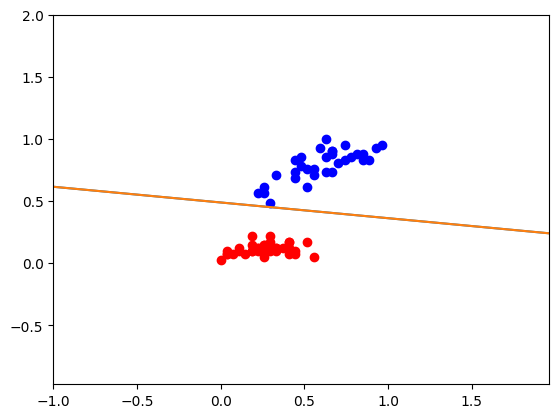

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


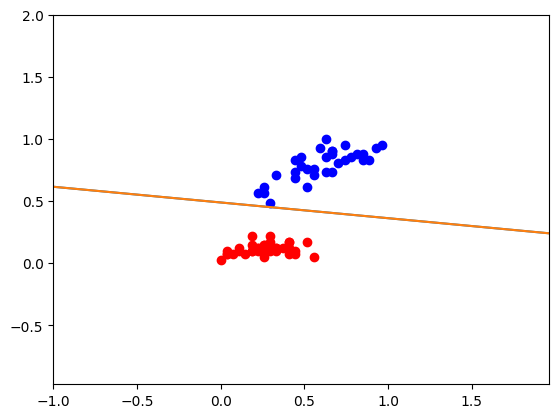

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


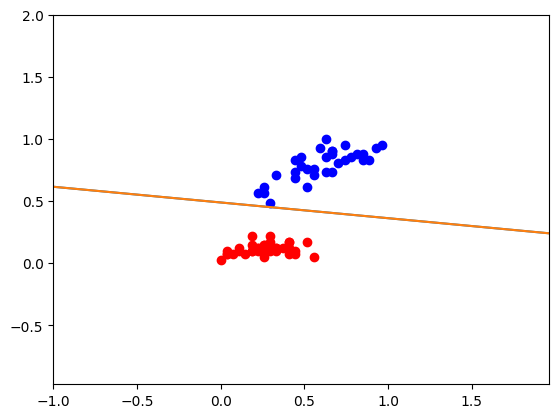

Bobot: [-1.0, 0.2592592592592595, 2.048780487804878]


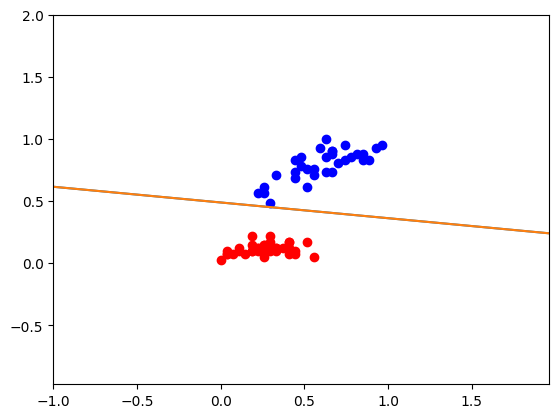

Epochs: 3
Accuracy: 1.0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = iris[['sepal_length', 'petal_length']].to_numpy()
X = minmax_scale(X)

y = iris['species'].to_numpy()
c = {'setosa': -1, 'versicolor': 1}
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
w, epoch = percep_fit(X_train, y_train, verbose=True, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [1.0, 1.4, 0.2]


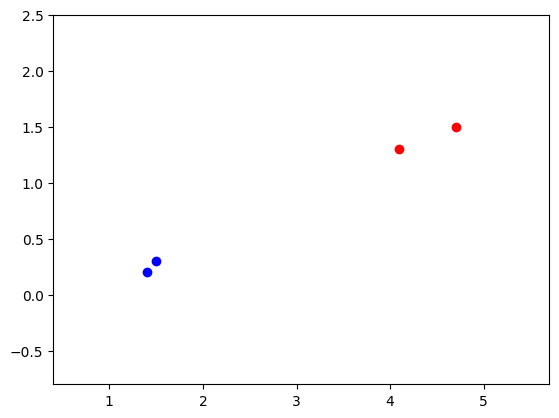

Bobot: [1.0, 1.4, 0.2]


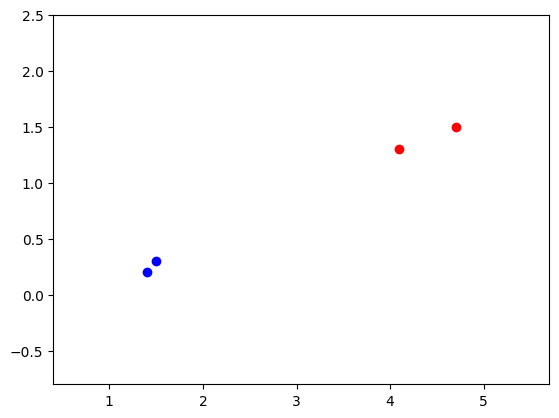

Bobot: [0.0, -3.3000000000000003, -1.3]


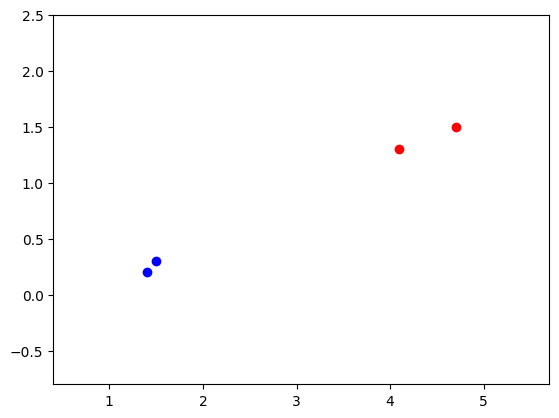

Bobot: [0.0, -3.3000000000000003, -1.3]


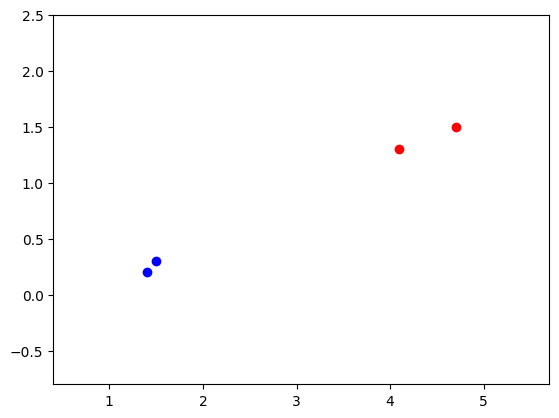


Epoch 2
Bobot: [1.0, -1.9000000000000004, -1.1]


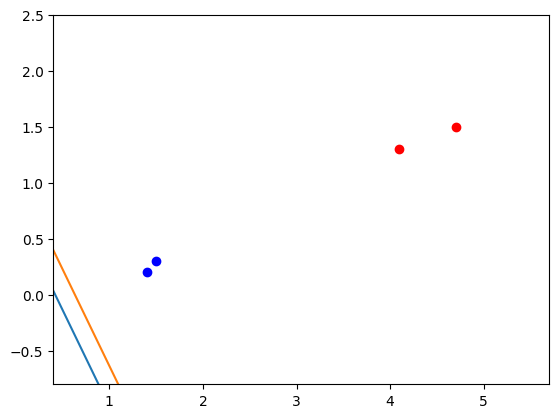

Bobot: [2.0, -0.40000000000000036, -0.8]


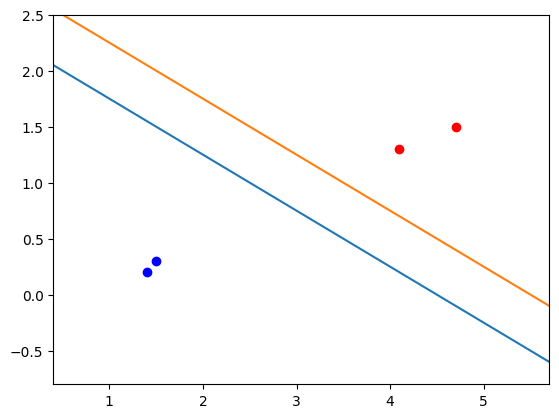

Bobot: [2.0, -0.40000000000000036, -0.8]


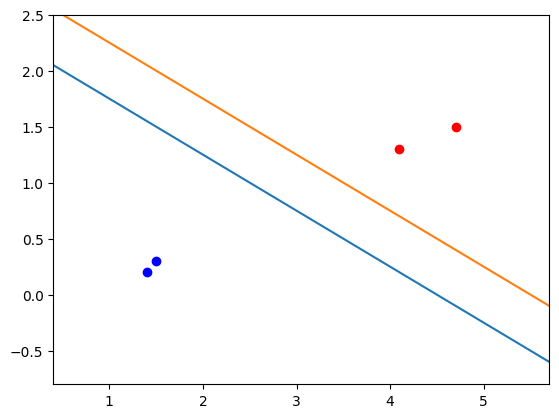

Bobot: [2.0, -0.40000000000000036, -0.8]


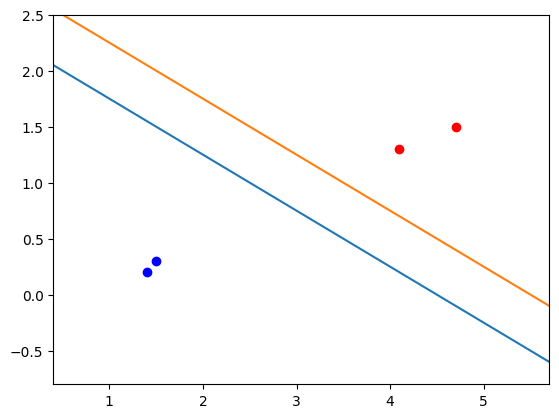


Epoch 3
Bobot: [2.0, -0.40000000000000036, -0.8]


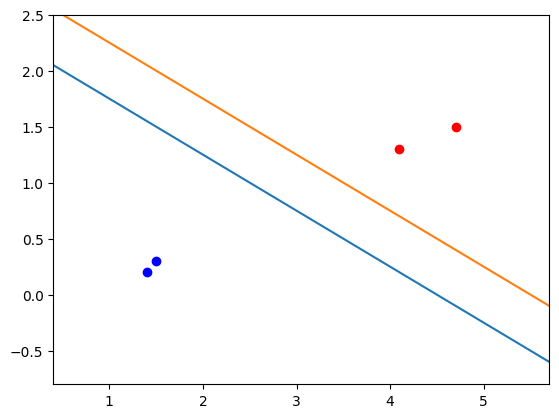

Bobot: [2.0, -0.40000000000000036, -0.8]


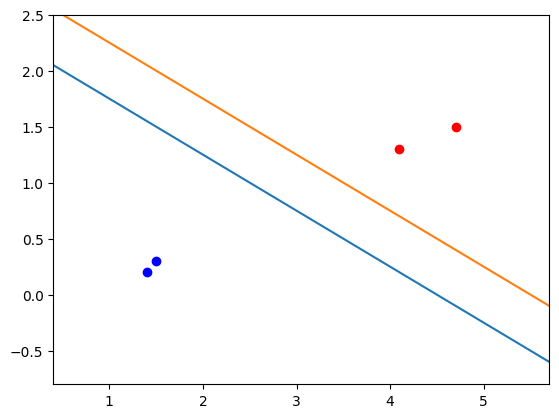

Bobot: [2.0, -0.40000000000000036, -0.8]


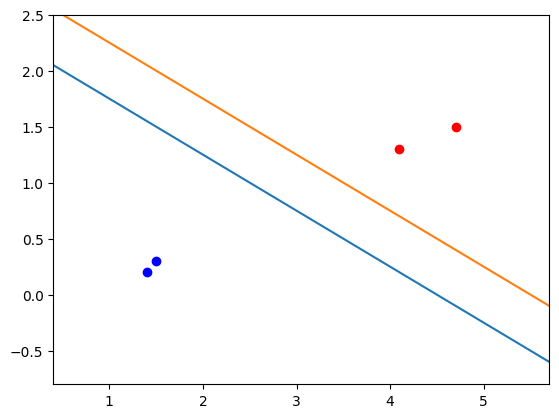

Bobot: [2.0, -0.40000000000000036, -0.8]


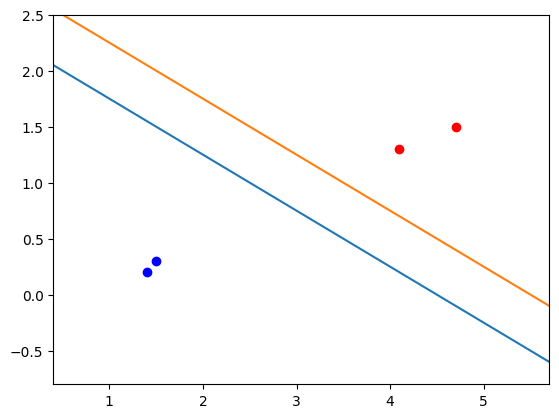

Epochs: 3
Output: [1, 1, -1, -1]
Target: (1, 1, -1, -1)
Accuracy: 1.0


In [ ]:

train = (1.4, 0.2), (1.5, 0.3), (4.7, 1.5), (4.1, 1.3)
target = 1, 1, -1, -1
th = .2
model, epoch = percep_fit(train, target, th, verbose=True, draw=True)
output = percep_predict(train, model)
accuracy = calc_accuracy(output, target)

print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)